In [1]:
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import cross_validation
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../dataset/mlb_fa_list2.csv')

print(df.shape)
df.tail()

(1225, 72)


,Name,Yr,Team,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP,Contract Yrs,Total Salary($),Avg Salary($)
1220,Trevor Plouffe,2016,Twins,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1221,Tyson Ross,2016,Padres,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,1.0,6000000.0,6000000.0
1222,Welington Castillo,2016,Diamondbacks,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1223,Wilson Ramos,2016,Nationals,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1224,Yoenis Cespedes,2016,Mets,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [4]:
df.rename(columns={"wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs"}, inplace=True)
df.rename(columns={"BB%": "BB_Percent", "K%": "K_Percent", "K-BB%": "K_BB_Percent", "GB%": "GB_Percent",
                   "LOB%": "LOB_Percent"}, inplace=True)
df.rename(columns={"Avg Salary($)": "Salary", "Total Salary($)" : "Total_Salary"}, inplace=True)
df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples"}, inplace=True)
df.rename(columns={"BB/K" : "BB_per_K", "HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                   "HR/FB" : "HR_per_FB"}, inplace=True)

df.tail()

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1220,Trevor Plouffe,2016,Twins,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1221,Tyson Ross,2016,Padres,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,1.0,6000000.0,6000000.0
1222,Welington Castillo,2016,Diamondbacks,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1223,Wilson Ramos,2016,Nationals,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1224,Yoenis Cespedes,2016,Mets,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [5]:
df.dtypes

Name             object
Yr                int64
Team             object
G                 int64
AB              float64
PA              float64
H_b             float64
Hits            float64
Doubles         float64
Triples         float64
HR_b            float64
R_b             float64
RBI             float64
BB_b            float64
IBB_b           float64
SO_b            float64
BB_Percent      float64
K_Percent       float64
BB_per_K        float64
BABIP_b         float64
HBP_b           float64
SF              float64
SH              float64
GDP             float64
SB              float64
CS              float64
Def             float64
ISO             float64
wOBA            float64
wRAA            float64
AVG             float64
OBP             float64
SLG             float64
OPS             float64
WAR             float64
wRC_Plus        float64
WPA             float64
W               float64
L               float64
GS              float64
CG              float64
IP              

In [6]:
## 각 변수별 기초통계량 확인

df.describe()

,Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1.225000e+03,1.225000e+03
mean,2010.713469,78.243265,189.861224,212.893061,49.512653,32.977143,9.815510,0.844082,5.88000,24.641633,24.104490,18.352653,1.332245,37.863673,4.477714,10.136816,0.266882,0.156652,1.991837,1.582041,1.07102,4.404082,2.777959,1.071837,-0.564163,0.078505,0.169473,0.764490,0.136124,0.172531,0.214606,0.387136,1.038367,50.057143,0.06382,2.506122,2.524082,4.735510,0.12000,43.304490,43.427755,4.830204,14.325714,33.914286,21.238367,1.881633,0.753469,0.141224,19.537959,1.524898,2.573878,1.154286,0.058776,185.241633,1.428571,0.477167,1.539192,3.540939,1.259412,5.298612,21.200163,4.958041,35.389469,1.950302,0.141492,1.962767,0.646392,1.665306,1.305786e+07,4.817255e+06
std,3.373100,44.031142,210.794712,236.325069,57.347995,38.905086,11.791777,1.735166,8.66145,29.706595,29.899022,23.448624,2.799069,44.552864,4.822388,10.684621,0.302980,0.147938,3.232029,2.237165,2.35439,5.722689,6.594809,2.117018,6.452877,0.085018,0.160529,8.998061,0.129135,0.163066,0.206868,0.368163,1.426539,50.931920,1.42512,3.986723,3.887673,10.266319,0.50436,61.513315,63.559592,7.455460,20.085012,47.451661,31.547433,6.933734,1.700526,0.471897,29.049801,2.531419,5.784358,1.847503,0.279718,261.903437,2.373946,0.599201,1.810092,3.947500,1.592168,6.994647,22.839611,6.072583,37.229548,2.297854,0.149470,2.147532,0.693953,1.284897,2.933066e+07,5.015766e+06
min,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-44.800000,0.000000,0.000000,-32.100000,0.000000,0.000000,0.000000,0.000000,-2.300000,-7.000000,-3.68000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.800000e+05,3.800000e+05
25%,2009.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.200000,0.000000,0.000000,-1.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,-0.87000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.400000e+06,1.350000e+06
50%,2011.000000,69.000000,115.000000,127.000000,27.000000,17.000000,4.000000,0.000000,1.00000,11.000000,10.000000,7.000000,0.000000,24.000000,3.90

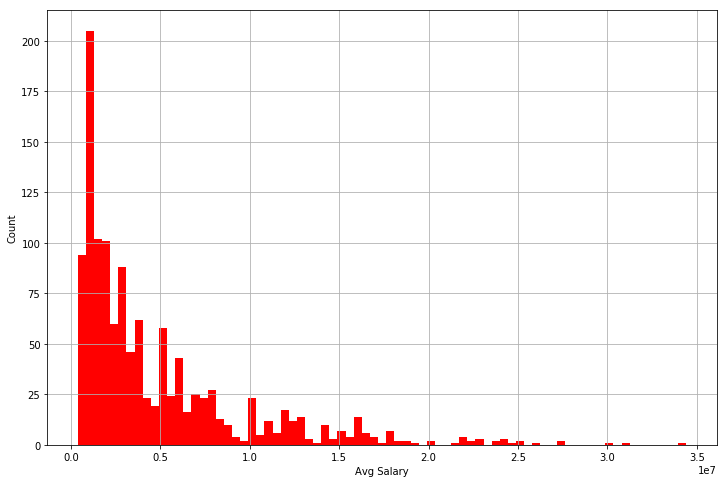

In [7]:
## Check distribution by Salary

plt.figure(figsize=(12, 8))
plt.hist(df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

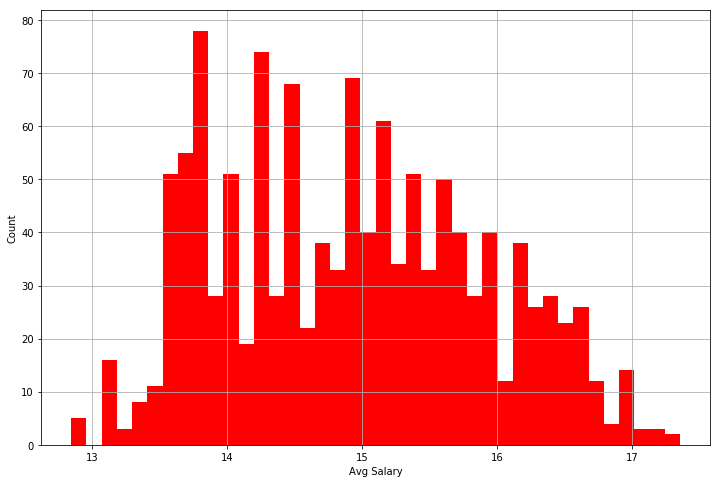

In [8]:
dfY_log = np.log(df['Salary'])

plt.figure(figsize=(12, 8))
plt.hist(dfY_log, bins=40, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

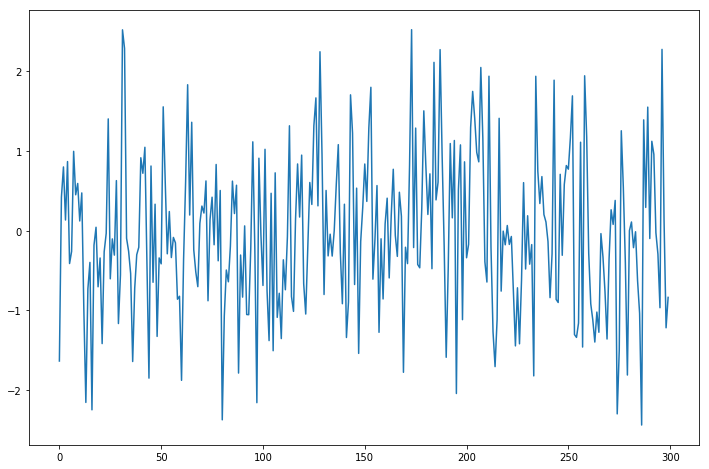

In [9]:
## Checking Gaussina white noise based on the year.

date = df['Yr'].copy()
date = sp.stats.norm.rvs(size=300)
plt.figure(figsize=(12, 8))
plt.plot(date)

In [10]:
## Grasping the number of players who sign a FA contract by year

df.groupby('Yr').count()['Name']

Yr
2005    109
2006     81
2007     91
2009    215
2010     91
2011     88
2012    117
2013    120
2014    105
2015    119
2016     89
Name: Name, dtype: int64

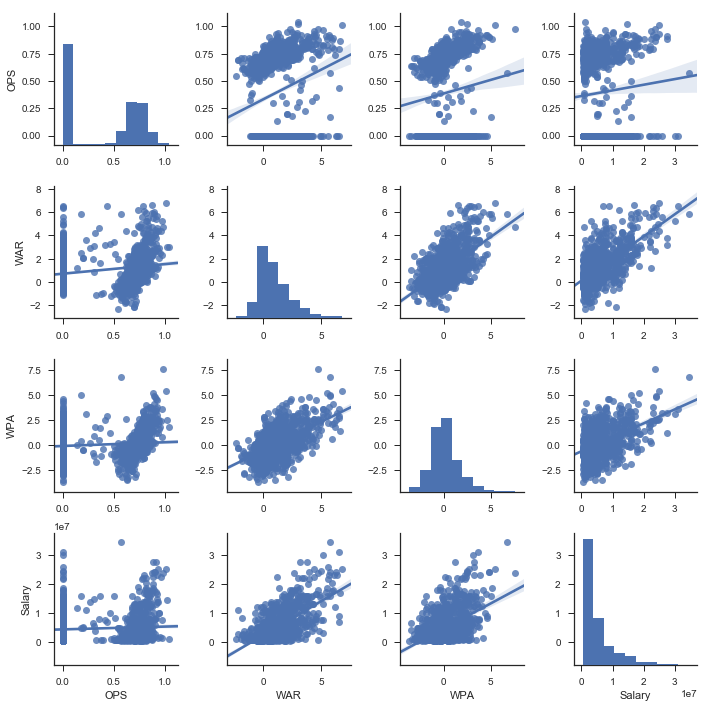

In [11]:
## Check the relationship between 'Salary' and the major indicators chosen among the various performance indicators by pairplot.

cols = ["OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(df[cols], kind="reg")

In [12]:
## Encoding Two Categorical Columns

def encode_df_x1(df):
    
    ## categorical variables of Yr
    df_yr_le = LabelEncoder()
    df['Yr'] = df_yr_le.fit_transform(df['Yr'])
    
    enc_dict_yr = {'Yr' : df_yr_le}
    
    return df, enc_dict_yr
    
def encode_df_x2(df):
    
    ## categorical variables of Team
    df_team_le = LabelEncoder()
    df['Team'] = df_team_le.fit_transform(df['Team'])
    
    enc_dict_team = {'Team' : df_team_le}
    
    return df, enc_dict_team

train_df_x1 = encode_df_x1(df)
train_df_x2 = encode_df_x2(df)

In [13]:
df.tail()

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1220,Trevor Plouffe,10,29,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1221,Tyson Ross,10,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,1.0,6000000.0,6000000.0
1222,Welington Castillo,10,10,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1223,Wilson Ramos,10,17,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1224,Yoenis Cespedes,10,16,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


## * Splitting Dependent & Independent Variables

In [14]:
df_x = df.iloc[:, 1:69]

In [15]:
print(df_x.shape)
df_x.tail()

(1225, 68)


,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,10,29,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,10,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,10,10,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,10,17,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,10,16,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [16]:
print(min(df['wRAA']))
print(min(df['Def']))
print(min(df['WAR']))
print(min(df['WPA']))

-32.1
-44.8
-2.3
-3.68


In [17]:
df_x_temp = df_x.copy()
df_x_temp[df_x_temp < 0] = 0
df_x = df_x_temp
df_x.head(10)

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
0,0,13,143,511.0,565.0,124.0,88.0,19.0,1.0,16.0,61.0,60.0,35.0,3.0,92.0,6.2,16.3,0.38,0.264,9.0,6.0,4.0,16.0,9.0,3.0,0.0,0.135,0.296,0.0,0.243,0.299,0.378,0.677,0.2,80.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1,0,20,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.6,0.0,0.09,4.0,0.0,0.0,0.0,72.1,47.0,6.0,23.0,54.0,21.0,0.0,1.0,0.0,18.0,5.0,2.0,2.0,0.0,286.0,0.0,0.75,2.86,6.72,2.35,10.8,39.5,7.8,81.1,2.24,0.207,3.77,0.97
2,0,19,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,1.7,0.0,0.00,11.0,5.0,22.0,0.0,128.2,140.0,14.0,44.0,100.0,70.0,0.0,0.0,0.0,61.0,5.0,0.0,6.0,0.0,568.0,5.0,0.98,3.08,6.99,2.27,9.9,40.8,9.6,70.3,4.27,0.311,4.02,1.43
3,0,1,129,416.0,460.0,125.0,100.0,23.0,0.0,2.0,49.0,37.0,29.0,1.0,64.0,6.3,13.9,0.45,0.348,7.0,3.0,5.0,5.0,19.0,4.0,15.5,0.070,0.323,0.0,0.300,0.354,0.370,0.724,3.2,98.0,0.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
4,0,31,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.00,2.0,5.0,0.0,0.0,52.0,62.0,10.0,14.0,38.0,47.0,1.0,2.0,1.0,44.0,2.0,10.0,3.0,0.0,231.0,1.0,1.73,2.42,6.58,2.71,10.4,40.5,16.1,48.4,7.62,0.311,4.98,1.46
5,0,24,96,250.0,273.0,58.0,43.0,8.0,4.0,3.0,25.0,24.0,11.0,0.0,30.0,4.0,11.0,0.37,0.250,5.0,3.0,4.0,6.0,7.0,2.0,11.0,0.100,0.268,0.0,0.232,0.275,0.332,0.607,0.7,59.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
6,0,15,130,435.0,478.0,115.0,80.0,30.0,1.0,9.0,47.0,45.0,31.0,10.0,81.0,6.8,19.3,0.38,0.316,5.0,3.0,4.0,13.0,5.0,3.0,11.8,0.140,0.320,0.0,0.269,0.323,0.410,0.733,2.1,96.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
7,0,22,156,637.0,682.0,171.0,90.0,43.0,2.0,36.0,102.0,104.0,33.0,3.0,125.0,4.8,18.3,0.26,0.281,7.0,5.0,0.0,6.0,30.0,2.0,0.0,0.243,0.347,12.2,0.268,0.309,0.512,0.821,2.4,108.0,1.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
8,0,2,33,62.0,79.0,5.0,5.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,19.0,1.3,24.1,0.05,0.114,0.0,1.0,15.0,0.0,0.0,0.0,8.0,0.000,0.081,0.0,0.081,0.094,0.081,0.174,5.8,0.0,5.02,17.0,9.0,33.0,0.0,222.1,188.0,17.0,41.0,171.0,66.0,0.0,0.0,0.0,59.0,3.0,0.0,0.0,0.0,875.0,2.0,0.69,1.66,6.92,4.17,14.9,50.2,9.8,79.7,2.39,0.266,3.07,1.03
9,0,8,123,463.0,506.0,140.0,79.0,30.0,0.0,31.0,72.0,92.0,35.0,4.0,60.0,6.9,11.9,0.58,0.291,6.0,2.0,0.0,15.0,0.0,1.0,0.0,0.266,0.392,27.5,0.302,0.358,0.568,0.926,2.9,136.0,2.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [18]:
df_y = pd.DataFrame(df['Salary'])

print(df_y.shape)
df_y.tail()

(1225, 1)


,Salary
1220,5250000.0
1221,6000000.0
1222,6500000.0
1223,6250000.0
1224,27500000.0


In [19]:
df_y2 = pd.DataFrame(np.log(df['Salary']))

print(df_y2.shape)
df_y2.tail()

(1225, 1)


,Salary
1220,15.473739
1221,15.607270
1222,15.687313
1223,15.648092
1224,17.129697


In [20]:
df_x_corr = df_x.corr()
df_x_corr.tail()

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
LOB_Percent,0.085814,-0.004271,-0.737424,-0.834416,-0.833830,-0.805638,-0.792231,-0.771840,-0.454795,-0.634219,-0.772804,-0.752884,-0.728583,-0.448724,-0.776992,-0.854971,-0.794930,-0.818162,-0.946350,-0.578303,-0.661015,-0.297222,-0.726020,-0.388487,-0.467588,-0.311780,-0.846597,-0.957012,-0.373032,-0.952412,-0.958676,-0.942325,-0.954100,-0.105135,-0.914656,0.048520,0.641647,0.632923,0.446973,0.234548,0.711523,0.678969,0.648604,0.716588,0.734023,0.654048,0.311100,0.477719,0.298027,0.653851,0.603393,0.484843,0.636549,0.207372,0.711619,0.601151,0.808438,0.864167,0.939932,0.838623,0.822940,0.948500,0.834466,1.000000,0.814397,0.959080,0.924049,0.935527
ERA,0.045769,0.042912,-0.725933,-0.748055,-0.747715,-0.721790,-0.709549,-0.692196,-0.406944,-0.568412,-0.693166,-0.674748,-0.653501,-0.402022,-0.697168,-0.766132,-0.717353,-0.732783,-0.850102,-0.517558,-0.594719,-0.281065,-0.648758,-0.350253,-0.421636,-0.290901,-0.759446,-0.858991,-0.334243,-0.855103,-0.860445,-0.845780,-0.856345,-0.173522,-0.819670,-0.139077,0.549611,0.671602,0.480246,0.216034,0.644028,0.667956,0.659471,0.690091,0.618575,0.707067,0.154051,0.339133,0.302377,0.711192,0.590654,0.295164,0.559294,0.193712,0.660405,0.577670,0.863548,0.856750,0.769830,0.621890,0.561350,0.851208,0.846040,0.814397,1.000000,0.915802,0.938334,0.949867
BABIP_p,0.087114,0.016844,-0.761655,-0.835046,-0.834625,-0.805748,-0.791750,-0.773324,-0.455416,-0.634966,-0.773858,-0.753235,-0.730240,-0.448738,-0.778565,-0.855142,-0.796807,-0.817683,-0.946770,-0.577731,-0.662928,-0.303114,-0.723820,-0.391431,-0.471258,-0.319801,-0.847632,-0.957507,-0.372745,-0.952791,-0.959002,-0.942993,-0.954620,-0.116411,-0.914655,-0.029281,0.633915,0.680384,0.484102,0.246698,0.719539,0.715664,0.661457,0.734542,0.727968,0.708771,0.252911,0.437705,0.308799,0.708692,0.620064,0.431702,0.643119,0.218322,0.727164,0.625481,0.810799,0.885860,0.916899,0.792705,0.764414,0.959269,0.835728,0.959080,0.915802,1.000000,0.939387,0.985329
FIP,0.039577,0.017976,-0.754958,-0.801940,-0.801461,-0.774317,-0.761633,-0.741426,-0.436225,-0.609394,-0.742985,-0.723700,-0.700035,-0.431525,-0.746347,-0.821583,-0.764727,-0.786441,-0.910081,-0.555665,-0.636904,-0.294577,-0.697865,-0.373688,-0.449755,-0.303139,-0.813420,-0.920101,-0.358923,-0.915870,-0.921775,-0.905882,-0.917279,-0.183151,-0.878957,-0.084708,0.608529,0.681231,0.493524,0.226093,0.695648,0.696624,0.711109,0.739194,0.669342,0.714439,0.198138,0.394011,0.327762,0.715222,0.629403,0.367330,0.607533,0.202868,0.706576,0.598449,0.926025,0.899630,0.830026,0.681721,0.626964,0.907552,0.911050,0.924049,0.938334,0.939387,1.000000,0.969461
WHIP,0.060169,0.025404,-0.760090,-0.820380,-0.819959,-0.791651,-0.778235,-0.759091,-0.446694,-0.623450,-0.760014,-0.739980,-0.716656,-0.440867,-0.764588,-0.840378,-0.785601,-0.803753,-0.931809,-0.567642,-0.651367,-0.304416,-0.711951,-0.383589,-0.461698,-0.315533,-0.832865,-0.941741,-0.366444,-0.937399,-0.943315,-0.927316,-0.938862,-0.158420,-0.898828,-0.072411,0.604623,0.674946,0.476605,0.224019,0.694741,0.699218,0.658478,0.745249,0.685620,0.707603,0.219841,0.416907,0.316231,0.707800,0.616268,0.399008,0.640536,0.198491,0.706926,0.621160,0.840173,0.929631,0.874621,0.707855,0.670798,0.943168,0.849520,0.935527,0.949867,0.985329,0.969461,1.000000


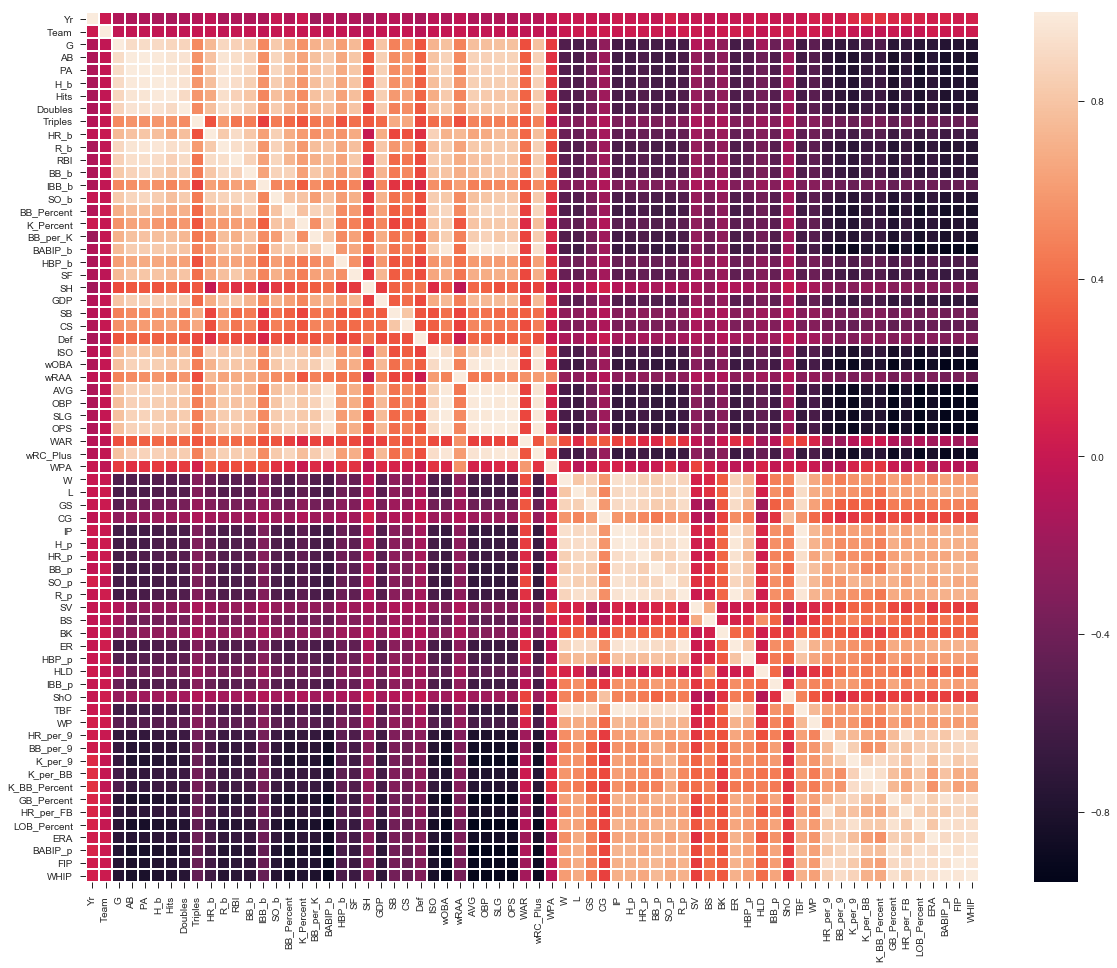

In [21]:
plt.figure(figsize=(20, 16))
corr_data = pd.DataFrame.corr(df_x)
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

## * Checking p-value using OLS Analysis

### * 1st OLS analysis

In [22]:
dfX1 = sm.add_constant(df_x)
dfY = pd.DataFrame(df_y, columns=["Salary"])
df_mlb = pd.concat([dfX1, dfY], axis=1)

In [23]:
dfY2 = pd.DataFrame(df_y2, columns=["Salary"])
df_mlb2 = pd.concat([dfX1, dfY2], axis=1)

In [24]:
model1 = sm.OLS(dfY, dfX1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     35.88
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.67e-236
Time:                        03:53:29   Log-Likelihood:                -19942.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1156   BIC:                         4.037e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.652e+06   1.09e+06      2.430   

In [25]:
dfX1_1 = dfX1.copy()

In [26]:
del_list = ['AB', 'PA', 'H_b', 'Hits', 'Doubles', 'Triples', 'HR_b', 'R_b', 'RBI', 'BB_b', 'SO_b', 'BB_Percent',
            'K_Percent', 'BB_per_K', 'BABIP_b', 'HBP_b', 'SF', 'SH', 'CS', 'Def', 'ISO', 'wOBA', 'AVG', 'wRC_Plus', 'WPA',
            'L', 'GS', 'IP', 'H_p', 'BB_p', 'R_p', 'BS', 'ER', 'HBP_p', 'HLD', 'IBB_p', 'ShO', 'TBF', 'WP', 'HR_per_9',
            'BB_per_9', 'K_per_9', 'K_per_BB', 'K_BB_Percent', 'GB_Percent', 'HR_per_FB', 'LOB_Percent', 'ERA', 'BABIP_p',
            'FIP', 'WHIP']

In [27]:
for item in del_list:
    del dfX1_1[item]
    
print(dfX1_1.columns.tolist())

['const', 'Yr', 'Team', 'G', 'IBB_b', 'GDP', 'SB', 'wRAA', 'OBP', 'SLG', 'OPS', 'WAR', 'W', 'CG', 'HR_p', 'SO_p', 'SV', 'BK']


In [28]:
model1_1 = sm.OLS(dfY, dfX1_1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          8.40e-238
Time:                        03:53:59   Log-Likelihood:                -20048.
No. Observations:                1225   AIC:                         4.013e+04
Df Residuals:                    1207   BIC:                         4.022e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.448e+05   3.93e+05     -1.387      0.1

In [73]:
dfX1_2 = dfX1_1.copy()

In [74]:
print(dfX1_2.columns)

Index(['const', 'Yr', 'Team', 'G', 'IBB_b', 'GDP', 'SB', 'wRAA', 'OBP', 'SLG',
       'OPS', 'WAR', 'W', 'CG', 'HR_p', 'SO_p', 'SV', 'BK'],
      dtype='object')


In [75]:
del_list2 = ['const', 'Team', 'CG', 'BK']

In [76]:
for item in del_list2:
    del dfX1_2[item]
    
print(dfX1_2.columns.tolist())

['Yr', 'G', 'IBB_b', 'GDP', 'SB', 'wRAA', 'OBP', 'SLG', 'OPS', 'WAR', 'W', 'HR_p', 'SO_p', 'SV']


In [77]:
model1_2 = sm.OLS(dfY, dfX1_2)
result1_2 = model1_2.fit()
print(result1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     347.2
Date:                Mon, 15 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:44:12   Log-Likelihood:                -20050.
No. Observations:                1225   AIC:                         4.013e+04
Df Residuals:                    1211   BIC:                         4.020e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yr          2.467e+05   2.67e+04      9.246      0.0

## * Scaling the variables

In [78]:
cols = df_x.columns.tolist()

cat_cols = cols[:2]
num_cols = cols[2:70]

cat_cols_list = []
num_cols_list, num_cols_list2 = [], []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols:
        cat_cols_list.append("C(" + item1 + ")")
        
    for item2 in num_cols:
        num_cols_list.append("scale(" + item2 + ")")
        num_cols_list2.append("scale(" + "np.log1p(" + item2 + ")" + ")")
        
    return cat_cols_list, num_cols_list, num_cols_list2

converted_cols = r_style_cat_cols(cat_cols, num_cols)

In [79]:
num_cols_list3 = ['scale(np.log1p(G))', 'scale(np.log1p(AB))', 'scale(np.log1p(PA))', 'scale(np.log1p(H_b))',
                 'scale(np.log1p(Hits))', 'scale(np.log1p(Doubles))', 'scale(np.log1p(Triples))', 'scale(np.log1p(HR_b))',
                 'scale(np.log1p(R_b))', 'scale(np.log1p(RBI))', 'scale(np.log1p(BB_b))', 'scale(np.log1p(IBB_b))',
                 'scale(np.log1p(SO_b))', 'scale(np.log1p(BB_Percent))', 'scale(np.log1p(K_Percent))',
                 'scale(np.log1p(BB_per_K))', 'scale(np.log1p(BABIP_b))', 'scale(np.log1p(HBP_b))', 'scale(np.log1p(SF))',
                 'scale(np.log1p(SH))', 'scale(np.log1p(GDP))', 'scale(np.log1p(SB))', 'scale(np.log1p(CS))',
                 'scale(Def)', 'scale(np.log1p(ISO))', 'scale(np.log1p(wOBA))', 'scale(wRAA)',
                 'scale(np.log1p(AVG))', 'scale(np.log1p(OBP))', 'scale(np.log1p(SLG))', 'scale(np.log1p(OPS))',
                 'scale(WAR)', 'scale(np.log1p(wRC_Plus))', 'scale(WPA)', 'scale(np.log1p(W))',
                 'scale(np.log1p(L))', 'scale(np.log1p(GS))', 'scale(np.log1p(CG))', 'scale(np.log1p(IP))',
                 'scale(np.log1p(H_p))', 'scale(np.log1p(HR_p))', 'scale(np.log1p(BB_p))', 'scale(np.log1p(SO_p))',
                 'scale(np.log1p(R_p))', 'scale(np.log1p(SV))', 'scale(np.log1p(BS))', 'scale(np.log1p(BK))',
                 'scale(np.log1p(ER))', 'scale(np.log1p(HBP_p))', 'scale(np.log1p(HLD))', 'scale(np.log1p(IBB_p))',
                 'scale(np.log1p(ShO))', 'scale(np.log1p(TBF))', 'scale(np.log1p(WP))', 'scale(np.log1p(HR_per_9))',
                 'scale(np.log1p(BB_per_9))', 'scale(np.log1p(K_per_9))', 'scale(np.log1p(K_per_BB))',
                 'scale(np.log1p(K_BB_Percent))', 'scale(np.log1p(GB_Percent))', 'scale(np.log1p(HR_per_FB))',
                 'scale(np.log1p(LOB_Percent))', 'scale(np.log1p(ERA))', 'scale(np.log1p(BABIP_p))', 'scale(np.log1p(FIP))',
                 'scale(np.log1p(WHIP))']

# num_cols_list = " + ".join(num_cols_list_temp)

In [80]:
converted_cols_list = " + ".join(cat_cols_list + num_cols_list)
converted_cols_list2 = " + ".join(cat_cols_list + num_cols_list2)
converted_cols_list3 = " + ".join(cat_cols_list + num_cols_list3)
model_str = "Salary ~ "
model_str2 = "np.log1p(Salary) ~ "

## zero; To eliminate Intercept of Scaling categorical valiable.
zero = ' + 0'

ols_str_list = model_str + converted_cols_list + zero
ols_str_list2 = model_str2 + converted_cols_list2 + zero
ols_str_list3 = model_str2 + converted_cols_list3 + zero

merging_converted_cols = cat_cols_list + num_cols_list
merging_converted_cols2 = cat_cols_list + num_cols_list2
merging_converted_cols3 = cat_cols_list + num_cols_list3

# print(ols_str_list)
# print(converted_cols_list)
# print(converted_cols)
# print(merging_converted_cols)

### * 2nd OLS analysis (Not include 'ZERO')

In [81]:
dfX2 = dmatrix(converted_cols_list3, data=df_x)
dfX2_columns = dfX2.design_info.column_names
dfX2 = pd.DataFrame(dfX2, columns=dfX2_columns)

In [82]:
model2 = sm.OLS(dfY, dfX2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     20.11
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.45e-194
Time:                        14:44:59   Log-Likelihood:                -19979.
No. Observations:                1225   AIC:                         4.017e+04
Df Residuals:                    1117   BIC:                         4.073e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## * 1st Pre-processing Variables of model2 that failed the 5% P-VALUE Condition test

In [83]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [84]:
p_values3 = extracted_pvals(result2, 0.05)
# print(len(p_values))
# print(p_values)

extracted_features3 = list(p_values3.index.values)
extracted_df_x3 = dfX2.loc[:, extracted_features3]

extracted_df_x3.tail()

,scale(WAR),scale(wRAA),scale(np.log1p(G)),C(Yr)[T.10],scale(WPA),scale(np.log1p(SH)),C(Yr)[T.9],scale(np.log1p(GB_Percent)),scale(Def),scale(np.log1p(GS)),C(Yr)[T.8],scale(np.log1p(IBB_b)),scale(np.log1p(GDP)),scale(np.log1p(HR_p)),scale(np.log1p(R_p)),scale(np.log1p(SB)),scale(np.log1p(K_BB_Percent)),scale(np.log1p(OPS)),scale(np.log1p(L)),scale(np.log1p(HR_per_FB)),scale(np.log1p(BB_Percent)),scale(np.log1p(W))
1220,-0.860528,-0.395374,0.384157,1.0,-0.066357,0.420576,0.0,-0.959776,-0.430080,-0.508101,0.0,-0.694318,1.246463,-0.855605,-0.919171,0.036848,-0.897723,0.926960,-0.805222,-0.921013,0.635610,-0.800992
1221,-0.784712,-0.395374,-4.857974,1.0,-0.580376,-0.585014,0.0,1.083796,-0.430080,0.043536,0.0,-0.694318,-0.959722,-0.855605,0.270505,-0.669881,1.314539,-1.061672,-0.073165,-0.921013,-1.041250,-0.800992
1222,0.352529,-0.339063,0.794561,1.0,0.077569,-0.585014,0.0,-0.959776,2.285205,-0.508101,0.0,1.216270,0.631063,-0.855605,-0.919171,0.450258,-0.897723,0.973335,-0.805222,-0.921013,0.843745,-0.800992
1223,1.717219,2.237176,0.999526,1.0,2.071964,-0.585014,0.0,-0.959776,1.897307,-0.508101,0.0,0.819787,1.606448,-0.855605,-0.919171,-0.669881,-0.897723,1.186908,-0.805222,-0.921013,0.787384,-0.800992
1224,1.565586,2.814366,1.010077,1.0,2.719628,-0.585014,0.0,-0.959776,-0.430080,-0.508101,0.0,2.333893,1.444577,-0.855605,-0.919171,0.743577,-0.897723,1.253473,-0.805222,-0.921013,1.056664,-0.800992


### * 3-1 OLS analysis

In [85]:
dfX3_1 = sm.add_constant(extracted_df_x3)

model3_1 = sm.OLS(dfY, dfX3_1)
result3_1 = model3_1.fit()
print(result3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     80.56
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.44e-218
Time:                        14:47:51   Log-Likelihood:                -20082.
No. Observations:                1225   AIC:                         4.021e+04
Df Residuals:                    1202   BIC:                         4.033e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### * Trying to delete the variables myself

In [86]:
dfX3_1_copy = dfX3_1.copy()

In [87]:
del dfX3_1_copy['scale(wRAA)']
del dfX3_1_copy['scale(np.log1p(GB_Percent))']
del dfX3_1_copy['scale(np.log1p(GS))']
del dfX3_1_copy['scale(np.log1p(K_BB_Percent))']
del dfX3_1_copy['scale(np.log1p(HR_per_FB))']
del dfX3_1_copy['scale(np.log1p(OPS))']

In [88]:
dfX3_1_copy.shape

(1225, 17)

In [89]:
model_3_1_0 = sm.OLS(dfY, dfX3_1_copy)
result_3_1_0 = model_3_1_0.fit()
print(result_3_1_0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     109.9
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.26e-222
Time:                        14:48:33   Log-Likelihood:                -20087.
No. Observations:                1225   AIC:                         4.021e+04
Df Residuals:                    1208   BIC:                         4.029e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## * 2nd Pre-processing Variables of model3-1 that failed the 5% P-VALUE Condition test

In [90]:
p_values3_1 = extracted_pvals(result3_1, 0.05)

extracted_features3_1 = p_values3_1.index.values
extracted_df_x3_1 = dfX3_1.loc[:, extracted_features3_1]

dfX3_1_1 = sm.add_constant(extracted_df_x3_1)

model3_1_1 = sm.OLS(dfY, dfX3_1_1)
result3_1_1 = model3_1_1.fit()
print(result3_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.23e-219
Time:                        14:50:09   Log-Likelihood:                -20095.
No. Observations:                1225   AIC:                         4.022e+04
Df Residuals:                    1209   BIC:                         4.030e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.34

### * 2-2 OLS analysis (Include 'ZERO')
#### [zero; Constant Term to eliminate Intercept of Scaling categorical valiable]

In [91]:
ols_str_list

'Salary ~ C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [92]:
ols_str_list2

'np.log1p(Salary) ~ C(Yr) + C(Team) + scale(np.log1p(G)) + scale(np.log1p(AB)) + scale(np.log1p(PA)) + scale(np.log1p(H_b)) + scale(np.log1p(Hits)) + scale(np.log1p(Doubles)) + scale(np.log1p(Triples)) + scale(np.log1p(HR_b)) + scale(np.log1p(R_b)) + scale(np.log1p(RBI)) + scale(np.log1p(BB_b)) + scale(np.log1p(IBB_b)) + scale(np.log1p(SO_b)) + scale(np.log1p(BB_Percent)) + scale(np.log1p(K_Percent)) + scale(np.log1p(BB_per_K)) + scale(np.log1p(BABIP_b)) + scale(np.log1p(HBP_b)) + scale(np.log1p(SF)) + scale(np.log1p(SH)) + scale(np.log1p(GDP)) + scale(np.log1p(SB)) + scale(np.log1p(CS)) + scale(np.log1p(Def)) + scale(np.log1p(ISO)) + scale(np.log1p(wOBA)) + scale(np.log1p(wRAA)) + scale(np.log1p(AVG)) + scale(np.log1p(OBP)) + scale(np.log1p(SLG)) + scale(np.log1p(OPS)) + scale(np.log1p(WAR)) + scale(np.log1p(wRC_Plus)) + scale(np.log1p(WPA)) + scale(np.log1p(W)) + scale(np.log1p(L)) + scale(np.log1p(GS)) + scale(np.log1p(CG)) + scale(np.log1p(IP)) + scale(np.log1p(H_p)) + scale(np.log

In [93]:
ols_str_list3

'np.log1p(Salary) ~ C(Yr) + C(Team) + scale(np.log1p(G)) + scale(np.log1p(AB)) + scale(np.log1p(PA)) + scale(np.log1p(H_b)) + scale(np.log1p(Hits)) + scale(np.log1p(Doubles)) + scale(np.log1p(Triples)) + scale(np.log1p(HR_b)) + scale(np.log1p(R_b)) + scale(np.log1p(RBI)) + scale(np.log1p(BB_b)) + scale(np.log1p(IBB_b)) + scale(np.log1p(SO_b)) + scale(np.log1p(BB_Percent)) + scale(np.log1p(K_Percent)) + scale(np.log1p(BB_per_K)) + scale(np.log1p(BABIP_b)) + scale(np.log1p(HBP_b)) + scale(np.log1p(SF)) + scale(np.log1p(SH)) + scale(np.log1p(GDP)) + scale(np.log1p(SB)) + scale(np.log1p(CS)) + scale(Def) + scale(np.log1p(ISO)) + scale(np.log1p(wOBA)) + scale(wRAA) + scale(np.log1p(AVG)) + scale(np.log1p(OBP)) + scale(np.log1p(SLG)) + scale(np.log1p(OPS)) + scale(WAR) + scale(np.log1p(wRC_Plus)) + scale(WPA) + scale(np.log1p(W)) + scale(np.log1p(L)) + scale(np.log1p(GS)) + scale(np.log1p(CG)) + scale(np.log1p(IP)) + scale(np.log1p(H_p)) + scale(np.log1p(HR_p)) + scale(np.log1p(BB_p)) + scal

In [94]:
dfY2_temp = dfY2.copy()
dfY2_col = dfY2_temp.columns
for item3 in dfY2_temp.columns:
    log_salary = "np.log(" + item3 + ")"
    print(log_salary)
    
dfY2_temp.rename(columns={'Salary' : 'np.log(Salary)'}, inplace=True)
dfY2_temp.tail()

np.log(Salary)


,np.log(Salary)
1220,15.473739
1221,15.607270
1222,15.687313
1223,15.648092
1224,17.129697


In [95]:
converted_cols_list3

'C(Yr) + C(Team) + scale(np.log1p(G)) + scale(np.log1p(AB)) + scale(np.log1p(PA)) + scale(np.log1p(H_b)) + scale(np.log1p(Hits)) + scale(np.log1p(Doubles)) + scale(np.log1p(Triples)) + scale(np.log1p(HR_b)) + scale(np.log1p(R_b)) + scale(np.log1p(RBI)) + scale(np.log1p(BB_b)) + scale(np.log1p(IBB_b)) + scale(np.log1p(SO_b)) + scale(np.log1p(BB_Percent)) + scale(np.log1p(K_Percent)) + scale(np.log1p(BB_per_K)) + scale(np.log1p(BABIP_b)) + scale(np.log1p(HBP_b)) + scale(np.log1p(SF)) + scale(np.log1p(SH)) + scale(np.log1p(GDP)) + scale(np.log1p(SB)) + scale(np.log1p(CS)) + scale(Def) + scale(np.log1p(ISO)) + scale(np.log1p(wOBA)) + scale(wRAA) + scale(np.log1p(AVG)) + scale(np.log1p(OBP)) + scale(np.log1p(SLG)) + scale(np.log1p(OPS)) + scale(WAR) + scale(np.log1p(wRC_Plus)) + scale(WPA) + scale(np.log1p(W)) + scale(np.log1p(L)) + scale(np.log1p(GS)) + scale(np.log1p(CG)) + scale(np.log1p(IP)) + scale(np.log1p(H_p)) + scale(np.log1p(HR_p)) + scale(np.log1p(BB_p)) + scale(np.log1p(SO_p)) +

In [96]:
dfX2_temp_cols = converted_cols_list3.design_info.column_names
dfX2_temp = pd.DataFrame(dfX2_temp, columns=dfX2_temp_cols)
# extracted_features3_2 = list(p_values3_2.index.values)
# extracted_df_x3_2 = dfX3_2.loc[:, extracted_features3_2]
dfX2_temp

AttributeError: 'str' object has no attribute 'design_info'

In [98]:
df_x.head()

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
0,0,13,143,511.0,565.0,124.0,88.0,19.0,1.0,16.0,61.0,60.0,35.0,3.0,92.0,6.2,16.3,0.38,0.264,9.0,6.0,4.0,16.0,9.0,3.0,0.0,0.135,0.296,0.0,0.243,0.299,0.378,0.677,0.2,80.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1,0,20,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.6,0.0,0.09,4.0,0.0,0.0,0.0,72.1,47.0,6.0,23.0,54.0,21.0,0.0,1.0,0.0,18.0,5.0,2.0,2.0,0.0,286.0,0.0,0.75,2.86,6.72,2.35,10.8,39.5,7.8,81.1,2.24,0.207,3.77,0.97
2,0,19,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,1.7,0.0,0.00,11.0,5.0,22.0,0.0,128.2,140.0,14.0,44.0,100.0,70.0,0.0,0.0,0.0,61.0,5.0,0.0,6.0,0.0,568.0,5.0,0.98,3.08,6.99,2.27,9.9,40.8,9.6,70.3,4.27,0.311,4.02,1.43
3,0,1,129,416.0,460.0,125.0,100.0,23.0,0.0,2.0,49.0,37.0,29.0,1.0,64.0,6.3,13.9,0.45,0.348,7.0,3.0,5.0,5.0,19.0,4.0,15.5,0.070,0.323,0.0,0.300,0.354,0.370,0.724,3.2,98.0,0.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
4,0,31,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.00,2.0,5.0,0.0,0.0,52.0,62.0,10.0,14.0,38.0,47.0,1.0,2.0,1.0,44.0,2.0,10.0,3.0,0.0,231.0,1.0,1.73,2.42,6.58,2.71,10.4,40.5,16.1,48.4,7.62,0.311,4.98,1.46


In [99]:
num_list = df_x.iloc[:, 2:].copy()
num_list.tail()

,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,0.0,0.160,0.311,0.0,0.260,0.303,0.420,0.723,0.0,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,0.00,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,0.0,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [100]:
cat_list = df_x.iloc[:, 0:2].copy()
cat_list.tail()

,Yr,Team
1220,10,29
1221,10,19
1222,10,10
1223,10,17
1224,10,16


In [101]:
for item in num_list:
    num_list[item] = np.log1p(num_list[item])

num_list.tail()

,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,4.442651,5.768321,5.843544,4.430817,4.060443,2.639057,0.693147,2.564949,3.583519,3.871201,2.995732,0.000000,4.110874,1.871802,2.912351,0.277632,0.249980,1.098612,1.386294,0.693147,2.484907,0.693147,0.000000,0.000000,0.148420,0.270790,0.000000,0.231112,0.264669,0.350657,0.544067,0.000000,4.521789,0.405465,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1221,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095310,0.000000,0.000000,0.0,0.693147,0.693147,0.0,1.808289,2.302585,0.0,0.693147,1.791759,2.197225,0.0,0.0,0.0,2.079442,1.098612,0.0,0.0,0.0,3.332205,0.693147,0.0,0.989541,2.244956,1.791759,2.76001,3.8795,0.0,3.535145,2.550226,0.38798,1.376244,1.05779
1222,4.736198,6.033086,6.126869,4.709530,4.290459,3.218876,0.000000,2.708050,3.737670,4.234107,3.526361,1.386294,4.804021,2.104134,3.314186,0.239017,0.290428,1.609438,1.609438,0.000000,1.791759,1.098612,0.000000,2.379546,0.147558,0.276874,0.336472,0.234281,0.279146,0.352767,0.556755,0.955511,4.521789,0.494696,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1223,4.882802,6.180017,6.261492,5.003946,4.624973,3.258097,0.000000,3.135494,4.077537,4.394449,3.583519,1.098612,4.382027,2.041220,2.778819,0.364643,0.282921,1.098612,1.609438,0.000000,2.890372,0.000000,0.000000,2.240710,0.173113,0.308220,2.980619,0.267734,0.303063,0.402795,0.615186,1.481605,4.828314,1.275363,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1224,4.890349,6.173786,6.298949,4.905275,4.356709,3.258097,0.693147,3.465736,4.290459,4.465908,3.951244,2.197225,4.691348,2.341806,3.039749,0.385262,0.260825,2.079442,1.945910,0.000000,2.708050,1.386294,0.693147,0.000000,0.223943,0.314081,3.169686,0.246860,0.303063,0.425268,0.633397,1.435085,4.912655,1.437463,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000


In [102]:
log_df = pd.concat([cat_list, num_list], axis=1)
log_df.tail()

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,10,29,4.442651,5.768321,5.843544,4.430817,4.060443,2.639057,0.693147,2.564949,3.583519,3.871201,2.995732,0.000000,4.110874,1.871802,2.912351,0.277632,0.249980,1.098612,1.386294,0.693147,2.484907,0.693147,0.000000,0.000000,0.148420,0.270790,0.000000,0.231112,0.264669,0.350657,0.544067,0.000000,4.521789,0.405465,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1221,10,19,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095310,0.000000,0.000000,0.0,0.693147,0.693147,0.0,1.808289,2.302585,0.0,0.693147,1.791759,2.197225,0.0,0.0,0.0,2.079442,1.098612,0.0,0.0,0.0,3.332205,0.693147,0.0,0.989541,2.244956,1.791759,2.76001,3.8795,0.0,3.535145,2.550226,0.38798,1.376244,1.05779
1222,10,10,4.736198,6.033086,6.126869,4.709530,4.290459,3.218876,0.000000,2.708050,3.737670,4.234107,3.526361,1.386294,4.804021,2.104134,3.314186,0.239017,0.290428,1.609438,1.609438,0.000000,1.791759,1.098612,0.000000,2.379546,0.147558,0.276874,0.336472,0.234281,0.279146,0.352767,0.556755,0.955511,4.521789,0.494696,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1223,10,17,4.882802,6.180017,6.261492,5.003946,4.624973,3.258097,0.000000,3.135494,4.077537,4.394449,3.583519,1.098612,4.382027,2.041220,2.778819,0.364643,0.282921,1.098612,1.609438,0.000000,2.890372,0.000000,0.000000,2.240710,0.173113,0.308220,2.980619,0.267734,0.303063,0.402795,0.615186,1.481605,4.828314,1.275363,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1224,10,16,4.890349,6.173786,6.298949,4.905275,4.356709,3.258097,0.693147,3.465736,4.290459,4.465908,3.951244,2.197225,4.691348,2.341806,3.039749,0.385262,0.260825,2.079442,1.945910,0.000000,2.708050,1.386294,0.693147,0.000000,0.223943,0.314081,3.169686,0.246860,0.303063,0.425268,0.633397,1.435085,4.912655,1.437463,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000


In [103]:
ols_str_list

'Salary ~ C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [104]:
log_df_x = log_df
log_df_y = dfY2_temp

In [105]:
log_df.tail()

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,10,29,4.442651,5.768321,5.843544,4.430817,4.060443,2.639057,0.693147,2.564949,3.583519,3.871201,2.995732,0.000000,4.110874,1.871802,2.912351,0.277632,0.249980,1.098612,1.386294,0.693147,2.484907,0.693147,0.000000,0.000000,0.148420,0.270790,0.000000,0.231112,0.264669,0.350657,0.544067,0.000000,4.521789,0.405465,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1221,10,19,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095310,0.000000,0.000000,0.0,0.693147,0.693147,0.0,1.808289,2.302585,0.0,0.693147,1.791759,2.197225,0.0,0.0,0.0,2.079442,1.098612,0.0,0.0,0.0,3.332205,0.693147,0.0,0.989541,2.244956,1.791759,2.76001,3.8795,0.0,3.535145,2.550226,0.38798,1.376244,1.05779
1222,10,10,4.736198,6.033086,6.126869,4.709530,4.290459,3.218876,0.000000,2.708050,3.737670,4.234107,3.526361,1.386294,4.804021,2.104134,3.314186,0.239017,0.290428,1.609438,1.609438,0.000000,1.791759,1.098612,0.000000,2.379546,0.147558,0.276874,0.336472,0.234281,0.279146,0.352767,0.556755,0.955511,4.521789,0.494696,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1223,10,17,4.882802,6.180017,6.261492,5.003946,4.624973,3.258097,0.000000,3.135494,4.077537,4.394449,3.583519,1.098612,4.382027,2.041220,2.778819,0.364643,0.282921,1.098612,1.609438,0.000000,2.890372,0.000000,0.000000,2.240710,0.173113,0.308220,2.980619,0.267734,0.303063,0.402795,0.615186,1.481605,4.828314,1.275363,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1224,10,16,4.890349,6.173786,6.298949,4.905275,4.356709,3.258097,0.693147,3.465736,4.290459,4.465908,3.951244,2.197225,4.691348,2.341806,3.039749,0.385262,0.260825,2.079442,1.945910,0.000000,2.708050,1.386294,0.693147,0.000000,0.223943,0.314081,3.169686,0.246860,0.303063,0.425268,0.633397,1.435085,4.912655,1.437463,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000


In [106]:
log_df_y = log_df_y.rename(columns={"np.log(Salary)" : "Salary"})
log_df_y.tail()

,Salary
1220,15.473739
1221,15.607270
1222,15.687313
1223,15.648092
1224,17.129697


In [107]:
log_dfX1 = sm.add_constant(log_df_x)
log_dfY = pd.DataFrame(log_df_y, columns=["Salary"])

In [108]:
model2_2 = sm.OLS(dfY2_temp, log_dfX1)
result2_2 = model2_2.fit()
print(result2_2.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Salary)   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     21.74
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.03e-161
Time:                        14:52:12   Log-Likelihood:                -1192.9
No. Observations:                1225   AIC:                             2524.
Df Residuals:                    1156   BIC:                             2876.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.8642      0.465     34.149   

In [109]:
_cat = log_dfX1.iloc[:, 1:3]
_num = log_dfX1.iloc[:, 3:]

In [110]:
front_cat = "C("
back_cat = ")"
front_num = "scale("
back_num = ")"

In [111]:
for item1 in _cat:
    _cat.rename(columns={item1 : front_cat+item1+back_cat}, inplace=True)

_cat.tail()

,C(Yr),C(Team)
1220,10,29
1221,10,19
1222,10,10
1223,10,17
1224,10,16


In [112]:
for item2 in _num:
    _num.rename(columns={item2 : front_num+item2+back_num}, inplace=True)
    
_num.tail()

,scale(G),scale(AB),scale(PA),scale(H_b),scale(Hits),scale(Doubles),scale(Triples),scale(HR_b),scale(R_b),scale(RBI),scale(BB_b),scale(IBB_b),scale(SO_b),scale(BB_Percent),scale(K_Percent),scale(BB_per_K),scale(BABIP_b),scale(HBP_b),scale(SF),scale(SH),scale(GDP),scale(SB),scale(CS),scale(Def),scale(ISO),scale(wOBA),scale(wRAA),scale(AVG),scale(OBP),scale(SLG),scale(OPS),scale(WAR),scale(wRC_Plus),scale(WPA),scale(W),scale(L),scale(GS),scale(CG),scale(IP),scale(H_p),scale(HR_p),scale(BB_p),scale(SO_p),scale(R_p),scale(SV),scale(BS),scale(BK),scale(ER),scale(HBP_p),scale(HLD),scale(IBB_p),scale(ShO),scale(TBF),scale(WP),scale(HR_per_9),scale(BB_per_9),scale(K_per_9),scale(K_per_BB),scale(K_BB_Percent),scale(GB_Percent),scale(HR_per_FB),scale(LOB_Percent),scale(ERA),scale(BABIP_p),scale(FIP),scale(WHIP)
1220,4.442651,5.768321,5.843544,4.430817,4.060443,2.639057,0.693147,2.564949,3.583519,3.871201,2.995732,0.000000,4.110874,1.871802,2.912351,0.277632,0.249980,1.098612,1.386294,0.693147,2.484907,0.693147,0.000000,0.000000,0.148420,0.270790,0.000000,0.231112,0.264669,0.350657,0.544067,0.000000,4.521789,0.405465,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1221,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095310,0.000000,0.000000,0.0,0.693147,0.693147,0.0,1.808289,2.302585,0.0,0.693147,1.791759,2.197225,0.0,0.0,0.0,2.079442,1.098612,0.0,0.0,0.0,3.332205,0.693147,0.0,0.989541,2.244956,1.791759,2.76001,3.8795,0.0,3.535145,2.550226,0.38798,1.376244,1.05779
1222,4.736198,6.033086,6.126869,4.709530,4.290459,3.218876,0.000000,2.708050,3.737670,4.234107,3.526361,1.386294,4.804021,2.104134,3.314186,0.239017,0.290428,1.609438,1.609438,0.000000,1.791759,1.098612,0.000000,2.379546,0.147558,0.276874,0.336472,0.234281,0.279146,0.352767,0.556755,0.955511,4.521789,0.494696,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1223,4.882802,6.180017,6.261492,5.003946,4.624973,3.258097,0.000000,3.135494,4.077537,4.394449,3.583519,1.098612,4.382027,2.041220,2.778819,0.364643,0.282921,1.098612,1.609438,0.000000,2.890372,0.000000,0.000000,2.240710,0.173113,0.308220,2.980619,0.267734,0.303063,0.402795,0.615186,1.481605,4.828314,1.275363,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1224,4.890349,6.173786,6.298949,4.905275,4.356709,3.258097,0.693147,3.465736,4.290459,4.465908,3.951244,2.197225,4.691348,2.341806,3.039749,0.385262,0.260825,2.079442,1.945910,0.000000,2.708050,1.386294,0.693147,0.000000,0.223943,0.314081,3.169686,0.246860,0.303063,0.425268,0.633397,1.435085,4.912655,1.437463,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000


In [113]:
log_df_X = pd.concat([_cat, _num], axis=1)
log_df_X.tail()

,C(Yr),C(Team),scale(G),scale(AB),scale(PA),scale(H_b),scale(Hits),scale(Doubles),scale(Triples),scale(HR_b),scale(R_b),scale(RBI),scale(BB_b),scale(IBB_b),scale(SO_b),scale(BB_Percent),scale(K_Percent),scale(BB_per_K),scale(BABIP_b),scale(HBP_b),scale(SF),scale(SH),scale(GDP),scale(SB),scale(CS),scale(Def),scale(ISO),scale(wOBA),scale(wRAA),scale(AVG),scale(OBP),scale(SLG),scale(OPS),scale(WAR),scale(wRC_Plus),scale(WPA),scale(W),scale(L),scale(GS),scale(CG),scale(IP),scale(H_p),scale(HR_p),scale(BB_p),scale(SO_p),scale(R_p),scale(SV),scale(BS),scale(BK),scale(ER),scale(HBP_p),scale(HLD),scale(IBB_p),scale(ShO),scale(TBF),scale(WP),scale(HR_per_9),scale(BB_per_9),scale(K_per_9),scale(K_per_BB),scale(K_BB_Percent),scale(GB_Percent),scale(HR_per_FB),scale(LOB_Percent),scale(ERA),scale(BABIP_p),scale(FIP),scale(WHIP)
1220,10,29,4.442651,5.768321,5.843544,4.430817,4.060443,2.639057,0.693147,2.564949,3.583519,3.871201,2.995732,0.000000,4.110874,1.871802,2.912351,0.277632,0.249980,1.098612,1.386294,0.693147,2.484907,0.693147,0.000000,0.000000,0.148420,0.270790,0.000000,0.231112,0.264669,0.350657,0.544067,0.000000,4.521789,0.405465,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1221,10,19,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095310,0.000000,0.000000,0.0,0.693147,0.693147,0.0,1.808289,2.302585,0.0,0.693147,1.791759,2.197225,0.0,0.0,0.0,2.079442,1.098612,0.0,0.0,0.0,3.332205,0.693147,0.0,0.989541,2.244956,1.791759,2.76001,3.8795,0.0,3.535145,2.550226,0.38798,1.376244,1.05779
1222,10,10,4.736198,6.033086,6.126869,4.709530,4.290459,3.218876,0.000000,2.708050,3.737670,4.234107,3.526361,1.386294,4.804021,2.104134,3.314186,0.239017,0.290428,1.609438,1.609438,0.000000,1.791759,1.098612,0.000000,2.379546,0.147558,0.276874,0.336472,0.234281,0.279146,0.352767,0.556755,0.955511,4.521789,0.494696,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1223,10,17,4.882802,6.180017,6.261492,5.003946,4.624973,3.258097,0.000000,3.135494,4.077537,4.394449,3.583519,1.098612,4.382027,2.041220,2.778819,0.364643,0.282921,1.098612,1.609438,0.000000,2.890372,0.000000,0.000000,2.240710,0.173113,0.308220,2.980619,0.267734,0.303063,0.402795,0.615186,1.481605,4.828314,1.275363,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1224,10,16,4.890349,6.173786,6.298949,4.905275,4.356709,3.258097,0.693147,3.465736,4.290459,4.465908,3.951244,2.197225,4.691348,2.341806,3.039749,0.385262,0.260825,2.079442,1.945910,0.000000,2.708050,1.386294,0.693147,0.000000,0.223943,0.314081,3.169686,0.246860,0.303063,0.425268,0.633397,1.435085,4.912655,1.437463,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000


## * 1st Pre-processing Variables of model2-2 that failed the 5% P-VALUE Condition test

In [114]:
df_X_copy = log_df_X.copy()
df_X_copy_list = list(df_X_copy.columns)
df_X_conv_list = cat_cols_list + num_cols_list

for item, item2 in zip(df_X_copy_list, df_X_conv_list):
    df_X_copy.rename(columns={item : item2}, inplace=True)
        
df_X_copy.tail()

,C(Yr),C(Team),scale(G),scale(AB),scale(PA),scale(H_b),scale(Hits),scale(Doubles),scale(Triples),scale(HR_b),scale(R_b),scale(RBI),scale(BB_b),scale(IBB_b),scale(SO_b),scale(BB_Percent),scale(K_Percent),scale(BB_per_K),scale(BABIP_b),scale(HBP_b),scale(SF),scale(SH),scale(GDP),scale(SB),scale(CS),scale(Def),scale(ISO),scale(wOBA),scale(wRAA),scale(AVG),scale(OBP),scale(SLG),scale(OPS),scale(WAR),scale(wRC_Plus),scale(WPA),scale(W),scale(L),scale(GS),scale(CG),scale(IP),scale(H_p),scale(HR_p),scale(BB_p),scale(SO_p),scale(R_p),scale(SV),scale(BS),scale(BK),scale(ER),scale(HBP_p),scale(HLD),scale(IBB_p),scale(ShO),scale(TBF),scale(WP),scale(HR_per_9),scale(BB_per_9),scale(K_per_9),scale(K_per_BB),scale(K_BB_Percent),scale(GB_Percent),scale(HR_per_FB),scale(LOB_Percent),scale(ERA),scale(BABIP_p),scale(FIP),scale(WHIP)
1220,10,29,4.442651,5.768321,5.843544,4.430817,4.060443,2.639057,0.693147,2.564949,3.583519,3.871201,2.995732,0.000000,4.110874,1.871802,2.912351,0.277632,0.249980,1.098612,1.386294,0.693147,2.484907,0.693147,0.000000,0.000000,0.148420,0.270790,0.000000,0.231112,0.264669,0.350657,0.544067,0.000000,4.521789,0.405465,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1221,10,19,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095310,0.000000,0.000000,0.0,0.693147,0.693147,0.0,1.808289,2.302585,0.0,0.693147,1.791759,2.197225,0.0,0.0,0.0,2.079442,1.098612,0.0,0.0,0.0,3.332205,0.693147,0.0,0.989541,2.244956,1.791759,2.76001,3.8795,0.0,3.535145,2.550226,0.38798,1.376244,1.05779
1222,10,10,4.736198,6.033086,6.126869,4.709530,4.290459,3.218876,0.000000,2.708050,3.737670,4.234107,3.526361,1.386294,4.804021,2.104134,3.314186,0.239017,0.290428,1.609438,1.609438,0.000000,1.791759,1.098612,0.000000,2.379546,0.147558,0.276874,0.336472,0.234281,0.279146,0.352767,0.556755,0.955511,4.521789,0.494696,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1223,10,17,4.882802,6.180017,6.261492,5.003946,4.624973,3.258097,0.000000,3.135494,4.077537,4.394449,3.583519,1.098612,4.382027,2.041220,2.778819,0.364643,0.282921,1.098612,1.609438,0.000000,2.890372,0.000000,0.000000,2.240710,0.173113,0.308220,2.980619,0.267734,0.303063,0.402795,0.615186,1.481605,4.828314,1.275363,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
1224,10,16,4.890349,6.173786,6.298949,4.905275,4.356709,3.258097,0.693147,3.465736,4.290459,4.465908,3.951244,2.197225,4.691348,2.341806,3.039749,0.385262,0.260825,2.079442,1.945910,0.000000,2.708050,1.386294,0.693147,0.000000,0.223943,0.314081,3.169686,0.246860,0.303063,0.425268,0.633397,1.435085,4.912655,1.437463,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000


In [115]:
ols_model_cols = " + ".join(df_X_copy.columns) + zero
ols_model_cols

'C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [116]:
p_values3_3 = extracted_pvals(result2_2, 0.05)
extracted_features3_3 = list(p_values3_3.index.values)
print(extracted_features3_3)

['const', 'WAR', 'Yr', 'G', 'SH', 'GS', 'L', 'W', 'SV', 'WPA', 'GB_Percent', 'wOBA', 'GDP', 'HR_per_FB', 'R_p', 'HR_p', 'BB_Percent']


In [117]:
log_dfX0 = sm.add_constant(log_df_X)
model_dfX0 = sm.OLS(log_dfY, log_dfX0)
result_dfX0 = model_dfX0.fit()
print(result_dfX0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     21.74
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.03e-161
Time:                        14:53:19   Log-Likelihood:                -1192.9
No. Observations:                1225   AIC:                             2524.
Df Residuals:                    1156   BIC:                             2876.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.8642    

In [118]:
newResult = [pvals for pvals in result_dfX0.pvalues if pvals <= 0.05]
newResult

[2.6479456090810352e-177,
 8.372077885223654e-11,
 7.6495322904735864e-08,
 0.045319687531981741,
 0.00010686897896953694,
 0.020302338253985946,
 0.016839270841259194,
 1.7097910486951033e-15,
 0.001321929938161328,
 0.00063685565838338077,
 0.00027099451221859229,
 0.00010877597350640349,
 0.034723105040582077,
 0.033764650752722246,
 0.00085756885678053287,
 0.0024201757374640209,
 0.021251355364743631]

In [ ]:
pval_index = []
for pvals in result_dfX0.pvalues.index:
    result_dfX0[pvals].pvalues
    pval_index.append(pvals)
#     if pvals.pvalues <= 0.05:
#         pval_index.append(pvals.pvalues)
#     else:
#         pass
# pval_index
pval_index

In [ ]:
result_dfX0_copy = result_dfX0
result_dfX0_copy = (result_dfX0_copy.pvalues < 0.05)[result_dfX0_copy.pvalues]
result_dfX0_copy.summary()

In [127]:
result_dfX0.pvalues

const                  2.647946e-177
C(Yr)                   8.372078e-11
C(Team)                 2.769776e-01
scale(G)                7.649532e-08
scale(AB)               9.145832e-01
scale(PA)               5.441279e-01
scale(H_b)              1.566337e-01
scale(Hits)             3.206850e-01
scale(Doubles)          2.385965e-01
scale(Triples)          6.484220e-01
scale(HR_b)             5.689931e-01
scale(R_b)              2.236289e-01
scale(RBI)              5.913737e-01
scale(BB_b)             6.788056e-02
scale(IBB_b)            7.878606e-01
scale(SO_b)             7.938554e-01
scale(BB_Percent)       4.531969e-02
scale(K_Percent)        9.276610e-01
scale(BB_per_K)         8.943629e-01
scale(BABIP_b)          7.150763e-01
scale(HBP_b)            5.224708e-01
scale(SF)               2.397296e-01
scale(SH)               1.068690e-04
scale(GDP)              2.030234e-02
scale(SB)               3.234393e-01
scale(CS)               6.395812e-01
scale(Def)              1.876214e-01
s

In [ ]:
def back_elim(df_x, dfY, cond):
    x_list = df_x
    
    count = 100

    while count > 0:
        x = sm.add_constant(x_list)
        model = sm.OLS(dfY, x)
        result = model.fit()
        
        sort_values = result.pvalues.sort_values(ascending=False)
        
#         if pvals[0] > cond:
#             dfX.drop(pvals.index[0], axis=1)
#         else:
#             pass
        if sort_values.index[0] == 'const':
            result = result.drop(sorted_pvalues.index[1], 1)
            
        else:
            result = result.drop(sorted_pvalues.index[0], 1)
            
        count = len(result.pvalues[result.pvalues >= cond])
        
    return pvals, result, dfX
back_elim_model = back_elim(log_df_X, log_dfY, 0.05)

In [129]:
dfX3_3 = dmatrix(ols_model_cols, data=log_df_x)
dfX3_3_columns = dfX3_3.design_info.column_names
dfX3_3 = pd.DataFrame(dfX3_3, columns=dfX3_3_columns)

p_values3_3 = extracted_pvals(result2_2, 0.05)
extracted_features3_3 = list(p_values3_3.index.values)
# extracted_df_x3_3 = dfX3_3.loc[:, extracted_features3_3]
print(extracted_features3_3, '\n\n')
print(dfX3_3.columns.tolist())

['const', 'WAR', 'Yr', 'G', 'SH', 'GS', 'L', 'W', 'SV', 'WPA', 'GB_Percent', 'wOBA', 'GDP', 'HR_per_FB', 'R_p', 'HR_p', 'BB_Percent'] 


['C(Yr)[0]', 'C(Yr)[1]', 'C(Yr)[2]', 'C(Yr)[3]', 'C(Yr)[4]', 'C(Yr)[5]', 'C(Yr)[6]', 'C(Yr)[7]', 'C(Yr)[8]', 'C(Yr)[9]', 'C(Yr)[10]', 'C(Team)[T.1]', 'C(Team)[T.2]', 'C(Team)[T.3]', 'C(Team)[T.4]', 'C(Team)[T.5]', 'C(Team)[T.6]', 'C(Team)[T.7]', 'C(Team)[T.8]', 'C(Team)[T.9]', 'C(Team)[T.10]', 'C(Team)[T.11]', 'C(Team)[T.12]', 'C(Team)[T.13]', 'C(Team)[T.14]', 'C(Team)[T.15]', 'C(Team)[T.16]', 'C(Team)[T.17]', 'C(Team)[T.18]', 'C(Team)[T.19]', 'C(Team)[T.20]', 'C(Team)[T.21]', 'C(Team)[T.22]', 'C(Team)[T.23]', 'C(Team)[T.24]', 'C(Team)[T.25]', 'C(Team)[T.26]', 'C(Team)[T.27]', 'C(Team)[T.28]', 'C(Team)[T.29]', 'C(Team)[T.30]', 'C(Team)[T.31]', 'scale(G)', 'scale(AB)', 'scale(PA)', 'scale(H_b)', 'scale(Hits)', 'scale(Doubles)', 'scale(Triples)', 'scale(HR_b)', 'scale(R_b)', 'scale(RBI)', 'scale(BB_b)', 'scale(IBB_b)', 'scale(SO_b)', 'scale(BB_Percent)'

In [ ]:
for i in result3_3.pvalues.sort_values(ascending=False):
    for item in dfX3_3_copy:
        if i > 0.5:
            dfX3_3_copy.drop(item, axis=1)
            
print(len(dfX3_3_copy.columns.tolist()), '\n\n', dfX3_3_copy.columns.tolist())

In [ ]:
for item in result3_3_copy.pvalues.index:
    dfX3_3_copy.drop(item, axis=1)
#     result3_3_copy.pvalues.sort_values(ascending=False).index.drop(item)
# print(len(dfX3_3_copy.columns.tolist()), '\n\n', dfX3_3_copy.columns.tolist())
# print(result3_3_copy.pvalues.sort_values(ascending=False).index)
len(dfX3_3_copy.columns.tolist())

In [ ]:
dfX3_3_copy1 = sm.add_constant(dfX3_3_copy)
model3_3_copy = sm.OLS(log_dfY, dfX3_3_copy1)
result3_3_copy = model3_3_copy.fit()
print(result3_3_copy.summary())

In [133]:
dfX3_3 = sm.add_constant(log_dfX1)
model3_3 = sm.OLS(log_dfY, dfX3_3)
result3_3 = model3_3.fit()
print(result3_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     21.74
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.03e-161
Time:                        14:55:31   Log-Likelihood:                -1192.9
No. Observations:                1225   AIC:                             2524.
Df Residuals:                    1156   BIC:                             2876.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.8642      0.465     34.149   

In [134]:
dfX3_2 = dmatrix(ols_model_cols, data=log_df_x)
dfX3_2_columns = dfX3_2.design_info.column_names
dfX3_2 = pd.DataFrame(dfX3_2, columns=dfX3_2_columns)

In [ ]:
p_values3_2 = extracted_pvals(result2_2, 0.05)
# # print(len(p_values3_2))
# print(p_values3_2)

extracted_features3_2 = list(p_values3_2.index.values)
extracted_df_x3_2 = dfX3_2.loc[:, extracted_features3_2]
extracted_df_x3_2
extracted_df_x3_2.tail()
extracted_features3_2

### * 3-2 OLS analysis

In [136]:
# dfX3_2 = sm.add_constant(extracted_df_x3_2)

model3_2 = sm.OLS(dfY, dfX3_3)
result3_2 = model3_2.fit()
print(result3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     24.85
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.06e-179
Time:                        14:56:08   Log-Likelihood:                -20085.
No. Observations:                1225   AIC:                         4.031e+04
Df Residuals:                    1156   BIC:                         4.066e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.607e+06   2.32e+06      3.283   

## * 2nd Pre-processing Variables of model3-2 that failed the 5% P-VALUE Condition test

In [ ]:
p_values3_2_2 = extracted_pvals(result3_2, 0.05)
extracted_features3_2_2 = list(p_values3_2_2.index.values)
extracted_df_x3_2_2 = dfX3_2.loc[:, extracted_features3_2_2]

extracted_df_x3_2_2.tail()

### * 3-2-2 OLS analysis

In [ ]:
dfX3_2_2 = sm.add_constant(extracted_df_x3_2_2)

model3_2_2 = sm.OLS(dfY, dfX3_2_2)
result3_2_2 = model3_2_2.fit()
print(result3_2_2.summary())

## * Eliminating Outliers of 3-2-2 OLS analysis RESULT

In [139]:
def elim_outliers(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX3_2_2.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [ ]:
idx = elim_outliers(result3_2_2)
print(idx, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx)))

In [ ]:
dfX3_2_2_idx = dfX3_2_2.drop(idx)
dfY_idx = dfY.drop(idx)

In [ ]:
print(dfX3_2_2_idx.shape, dfY_idx.shape)

### * 4th OLS analysis (Outliers Elim version of 3-2-2 model)

In [ ]:
dfX4_idx_elimVer = sm.add_constant(dfX3_2_2_idx)

model4_idx_elimVer = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer = model4_idx_elimVer.fit()
print(result4_idx_elimVer.summary())

## * Pre-processing Variables of model4 that failed the 5% P-VALUE Condition test

In [ ]:
p_values4 = extracted_pvals(result4_idx_elimVer, 0.05)
extracted_features4 = p_values4.index.values
extracted_df_x4 = dfX4_idx_elimVer.loc[:, extracted_features4]
extracted_df_x4.tail()

### * 4-1 OLS analysis

In [ ]:
dfX4_idx_elimVer = sm.add_constant(extracted_df_x4)

model4_idx_elimVer_filt = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer_filt = model4_idx_elimVer_filt.fit()
print(result4_idx_elimVer_filt.summary())

In [ ]:
fig = plt.figure(figsize=(10, 25))
sm.graphics.plot_ccpr_grid(result4_idx_elimVer_filt, fig=fig)
fig.suptitle("")
plt.show()

## * Trying to another OLS Modeling

## 1. Numeric Variables ONLY

In [147]:
converted_num_ols = " + ".join(num_cols_list)

num_ols_model = model_str + converted_num_ols
num_ols_model

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP)'

### * 5th OLS analysis

In [148]:
model5 = sm.OLS.from_formula(num_ols_model, df)
result5 = model5.fit()
print(result5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     35.19
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.04e-229
Time:                        14:58:47   Log-Likelihood:                -19963.
No. Observations:                1225   AIC:                         4.006e+04
Df Residuals:                    1158   BIC:                         4.040e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.817e+06    

## * 1st Filtrating P-VALUE under 5% of 5th OLS model

In [149]:
dfX5 = dmatrix(converted_num_ols, data=df_x)
dfX_columns5 = dfX5.design_info.column_names
dfX5 = pd.DataFrame(dfX5, columns=dfX_columns5)

In [150]:
p_values5 = extracted_pvals(result5, 0.05)

extracted_features5 = list(p_values5.index.values)
extracted_df_x5 = dfX5.loc[:, extracted_features5]

print(extracted_df_x5.shape)
extracted_df_x5.tail()

(1225, 21)


,Intercept,scale(wRAA),scale(G),scale(SV),scale(GDP),scale(SO_p),scale(SB),scale(WAR),scale(wOBA),scale(IBB_b),scale(HR_p),scale(SLG),scale(BK),scale(OBP),scale(W),scale(IBB_p),scale(OPS),scale(K_Percent),scale(K_per_9),scale(BABIP_b),scale(BB_per_9)
1220,1.0,-0.395374,0.130796,-0.271484,1.153062,-0.715004,-0.269710,-0.860528,0.881984,-0.476154,-0.648139,0.993282,-0.299392,0.800426,-0.628874,-0.625037,0.912641,0.680057,-0.897374,0.861173,-0.850686
1221,1.0,-0.395374,-1.755004,-0.271484,-0.769897,-0.609591,-0.421406,-0.784712,-1.056148,-0.476154,-0.648139,-1.037828,-0.299392,-1.058482,-0.628874,-0.625037,-1.051964,-0.949117,1.241561,-1.059341,0.083349
1222,1.0,-0.339063,0.789689,-0.271484,0.104175,-0.715004,-0.118014,0.352529,0.931840,0.596068,-0.648139,1.007790,-0.299392,0.916991,-0.628874,-0.625037,0.972422,1.532096,-0.897374,1.219578,-0.850686
1223,1.0,2.237176,1.198658,-0.271484,2.201948,-0.715004,-0.421406,1.717219,1.193581,0.238661,-0.648139,1.360816,-0.299392,1.113311,-0.628874,-0.625037,1.257738,0.464706,-0.897374,1.151955,-0.850686
1224,1.0,2.814366,1.221379,-0.271484,1.677505,-0.715004,0.033683,1.565586,1.243437,2.383106,-0.648139,1.525240,-0.299392,1.113311,-0.628874,-0.625037,1.350126,0.914134,-0.897374,0.955846,-0.850686


### * 6th OLS analysis

In [151]:
dfX6 = sm.add_constant(extracted_df_x5)

model6 = sm.OLS(dfY, dfX6)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     94.11
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.90e-229
Time:                        14:59:23   Log-Likelihood:                -20061.
No. Observations:                1225   AIC:                         4.016e+04
Df Residuals:                    1204   BIC:                         4.027e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.817e+06   9.02e+04  

## * 2nd Filtrating P-VALUE under 5% of 6th OLS model

In [152]:
p_values6 = extracted_pvals(result6, 0.05)

extracted_features6 = list(p_values6.index.values)
extracted_df_x6 = dfX6.loc[:, extracted_features6]

print(extracted_df_x6.shape)
extracted_df_x6.tail()

(1225, 17)


,Intercept,scale(WAR),scale(wRAA),scale(SO_p),scale(GDP),scale(SV),scale(SB),scale(IBB_p),scale(HR_p),scale(G),scale(BB_per_9),scale(IBB_b),scale(K_Percent),scale(SLG),scale(OBP),scale(OPS),scale(BABIP_b)
1220,1.0,-0.860528,-0.395374,-0.715004,1.153062,-0.271484,-0.269710,-0.625037,-0.648139,0.130796,-0.850686,-0.476154,0.680057,0.993282,0.800426,0.912641,0.861173
1221,1.0,-0.784712,-0.395374,-0.609591,-0.769897,-0.271484,-0.421406,-0.625037,-0.648139,-1.755004,0.083349,-0.476154,-0.949117,-1.037828,-1.058482,-1.051964,-1.059341
1222,1.0,0.352529,-0.339063,-0.715004,0.104175,-0.271484,-0.118014,-0.625037,-0.648139,0.789689,-0.850686,0.596068,1.532096,1.007790,0.916991,0.972422,1.219578
1223,1.0,1.717219,2.237176,-0.715004,2.201948,-0.271484,-0.421406,-0.625037,-0.648139,1.198658,-0.850686,0.238661,0.464706,1.360816,1.113311,1.257738,1.151955
1224,1.0,1.565586,2.814366,-0.715004,1.677505,-0.271484,0.033683,-0.625037,-0.648139,1.221379,-0.850686,2.383106,0.914134,1.525240,1.113311,1.350126,0.955846


### * 7th OLS analysis

In [153]:
dfX7 = sm.add_constant(extracted_df_x6)

model7 = sm.OLS(dfY, dfX7)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.02e-231
Time:                        14:59:58   Log-Likelihood:                -20064.
No. Observations:                1225   AIC:                         4.016e+04
Df Residuals:                    1208   BIC:                         4.025e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.817e+06   9.04e+04  

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [154]:
yr_str = 'C(Yr) + '

cat_num_ols_list = model_str + yr_str + converted_num_ols + zero
cat_num_ols_list

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 8th OLS analysis

In [155]:
model8 = sm.OLS.from_formula(cat_num_ols_list, df)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     32.76
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          7.43e-235
Time:                        15:00:26   Log-Likelihood:                -19931.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1148   BIC:                         4.041e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             4.356e+06   3

## * 1st Filtrating P-VALUE under 5% of 8th OLS model

In [156]:
filtration_str_list = yr_str + converted_num_ols + zero

dfX8 = dmatrix(filtration_str_list, data=df_x)
dfX_columns8 = dfX8.design_info.column_names
dfX8 = pd.DataFrame(dfX8, columns=dfX_columns8)

In [157]:
p_values8 = extracted_pvals(result8, 0.05)

extracted_features8 = list(p_values8.index.values)
extracted_df_x8 = dfX8.loc[:, extracted_features8]

print(extracted_df_x8.shape)
extracted_df_x8.tail()

(1225, 30)


,C(Yr)[9],C(Yr)[10],C(Yr)[3],C(Yr)[7],C(Yr)[6],C(Yr)[8],C(Yr)[0],C(Yr)[1],C(Yr)[2],C(Yr)[4],C(Yr)[5],scale(G),scale(SV),scale(IBB_b),scale(GDP),scale(WAR),scale(SB),scale(wRAA),scale(SO_p),scale(HR_p),scale(SLG),scale(BK),scale(OPS),scale(ER),scale(K_Percent),scale(BB_per_9),scale(OBP),scale(W),scale(BABIP_b),scale(IBB_p)
1220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130796,-0.271484,-0.476154,1.153062,-0.860528,-0.269710,-0.395374,-0.715004,-0.648139,0.993282,-0.299392,0.912641,-0.672842,0.680057,-0.850686,0.800426,-0.628874,0.861173,-0.625037
1221,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.755004,-0.271484,-0.476154,-0.769897,-0.784712,-0.421406,-0.395374,-0.609591,-0.648139,-1.037828,-0.299392,-1.051964,-0.431779,-0.949117,0.083349,-1.058482,-0.628874,-1.059341,-0.625037
1222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.789689,-0.271484,0.596068,0.104175,0.352529,-0.118014,-0.339063,-0.715004,-0.648139,1.007790,-0.299392,0.972422,-0.672842,1.532096,-0.850686,0.916991,-0.628874,1.219578,-0.625037
1223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.198658,-0.271484,0.238661,2.201948,1.717219,-0.421406,2.237176,-0.715004,-0.648139,1.360816,-0.299392,1.257738,-0.672842,0.464706,-0.850686,1.113311,-0.628874,1.151955,-0.625037
1224,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.221379,-0.271484,2.383106,1.677505,1.565586,0.033683,2.814366,-0.715004,-0.648139,1.525240,-0.299392,1.350126,-0.672842,0.914134,-0.850686,1.113311,-0.628874,0.955846,-0.625037


### * 9th OLS analysis

In [158]:
dfX9 = sm.add_constant(extracted_df_x8)

model9 = sm.OLS(dfY, dfX9)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     76.48
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.26e-248
Time:                        15:01:07   Log-Likelihood:                -19994.
No. Observations:                1225   AIC:                         4.005e+04
Df Residuals:                    1195   BIC:                         4.020e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.502e+06   8.14e+04  

## * 2nd Filtrating P-VALUE under 5% of 9th OLS model

In [159]:
p_values9 = extracted_pvals(result9, 0.05)

extracted_features9 = list(p_values9.index.values)
extracted_df_x9 = dfX9.loc[:, extracted_features9]

print(extracted_df_x9.shape)
extracted_df_x9.tail()

(1225, 23)


,const,scale(WAR),scale(SO_p),scale(GDP),scale(wRAA),scale(SV),scale(SB),scale(ER),C(Yr)[10],C(Yr)[9],scale(IBB_b),C(Yr)[8],scale(G),scale(W),C(Yr)[3],scale(IBB_p),scale(SLG),scale(OPS),scale(OBP),scale(BABIP_b),C(Yr)[7],scale(BK),scale(HR_p)
1220,1.0,-0.860528,-0.715004,1.153062,-0.395374,-0.271484,-0.269710,-0.672842,1.0,0.0,-0.476154,0.0,0.130796,-0.628874,0.0,-0.625037,0.993282,0.912641,0.800426,0.861173,0.0,-0.299392,-0.648139
1221,1.0,-0.784712,-0.609591,-0.769897,-0.395374,-0.271484,-0.421406,-0.431779,1.0,0.0,-0.476154,0.0,-1.755004,-0.628874,0.0,-0.625037,-1.037828,-1.051964,-1.058482,-1.059341,0.0,-0.299392,-0.648139
1222,1.0,0.352529,-0.715004,0.104175,-0.339063,-0.271484,-0.118014,-0.672842,1.0,0.0,0.596068,0.0,0.789689,-0.628874,0.0,-0.625037,1.007790,0.972422,0.916991,1.219578,0.0,-0.299392,-0.648139
1223,1.0,1.717219,-0.715004,2.201948,2.237176,-0.271484,-0.421406,-0.672842,1.0,0.0,0.238661,0.0,1.198658,-0.628874,0.0,-0.625037,1.360816,1.257738,1.113311,1.151955,0.0,-0.299392,-0.648139
1224,1.0,1.565586,-0.715004,1.677505,2.814366,-0.271484,0.033683,-0.672842,1.0,0.0,2.383106,0.0,1.221379,-0.628874,0.0,-0.625037,1.525240,1.350126,1.113311,0.955846,0.0,-0.299392,-0.648139


### * 10th OLS analysis

In [160]:
dfX10 = sm.add_constant(extracted_df_x9)

model10 = sm.OLS(dfY, dfX10)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     100.1
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.90e-253
Time:                        15:07:59   Log-Likelihood:                -20000.
No. Observations:                1225   AIC:                         4.005e+04
Df Residuals:                    1202   BIC:                         4.016e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.481e+06   1.27e+05     35.

## * Eliminating Outliers of 10th OLS analysis RESULT

In [161]:
def elim_outliers(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX10.columns) - 1)
    idx10 = np.where(cooks_d2 > fox_cr)[0]
    
    return idx10

In [163]:
idx10 = elim_outliers(result10)
print(idx10, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx10)))

[   7   13   15   19   28   36   41   53   66  105  113  115  119  137  144
  157  187  197  202  248  252  270  272  304  391  393  397  401  405  411
  416  438  457  460  462  489  499  501  502  507  539  540  549  558  571
  605  737  747  766  782  791  797  800  804  814  826  837  914  923  926
  953  958  976  993 1000 1020 1022 1036 1041 1049 1059 1073 1077 1088 1091
 1096 1106 1135 1156 1164 1177 1180 1183 1188 1189 1199 1202 1209 1223 1224] 

There are '90' Outliers according to Fox criteria


In [164]:
dfX10_idx = dfX10.drop(idx10)
dfY_idx10 = dfY.drop(idx10)

### * 10-1 OLS analysis

In [165]:
dfX10_idx_elimVer = sm.add_constant(dfX10_idx)
model10_idx_elimVer = sm.OLS(dfY_idx10, dfX10_idx_elimVer)
result10_idx_elimVer = model10_idx_elimVer.fit()
print(result10_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.16e-264
Time:                        15:09:26   Log-Likelihood:                -18189.
No. Observations:                1135   AIC:                         3.642e+04
Df Residuals:                    1112   BIC:                         3.654e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.287e+06   9.74e+04     44.

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [166]:
team_str = 'C(Team) + '

cat_num_ols_list2 = model_str + team_str + converted_num_ols + zero
cat_num_ols_list2

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 11th OLS analysis

In [168]:
model11 = sm.OLS.from_formula(cat_num_ols_list2, df)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     24.50
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          5.29e-215
Time:                        15:10:40   Log-Likelihood:                -19942.
No. Observations:                1225   AIC:                         4.008e+04
Df Residuals:                    1127   BIC:                         4.058e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           7.098e+06   3

## * 1st Filtrating P-VALUE under 5% of 11th OLS model

In [177]:
filtration_str_list2 = team_str + converted_num_ols + zero

dfX11 = dmatrix(filtration_str_list2, data=df_x)
dfX_columns11 = dfX11.design_info.column_names
dfX11 = pd.DataFrame(dfX11, columns=dfX_columns11)

In [179]:
p_values11 = extracted_pvals(result11, 0.05)

extracted_features11 = list(p_values11.index.values)
extracted_df_x11 = dfX11.loc[:, extracted_features11]

### * 12th OLS analysis

In [180]:
dfX12 = sm.add_constant(extracted_df_x11)

model12 = sm.OLS(dfY, dfX12)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     43.80
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.19e-220
Time:                        15:21:18   Log-Likelihood:                -20026.
No. Observations:                1225   AIC:                         4.015e+04
Df Residuals:                    1178   BIC:                         4.039e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.767e+06   1.31

## * 2nd Filtrating P-VALUE under 5% of 12th OLS model

In [181]:
p_values12 = extracted_pvals(result12, 0.05)

extracted_features12 = list(p_values12.index.values)
extracted_df_x12 = dfX12.loc[:, extracted_features12]

print(extracted_df_x12.shape)
extracted_df_x12.tail()

(1225, 16)


,const,scale(SO_p),scale(WAR),scale(ER),scale(wRAA),scale(GDP),scale(SV),scale(SB),scale(LOB_Percent),scale(G),scale(IBB_b),scale(HR_p),C(Team)[31],C(Team)[7],C(Team)[10],C(Team)[5]
1220,1.0,-0.715004,-0.860528,-0.672842,-0.395374,1.153062,-0.271484,-0.269710,-0.950963,0.130796,-0.476154,-0.648139,0.0,0.0,0.0,0.0
1221,1.0,-0.609591,-0.784712,-0.431779,-0.395374,-0.769897,-0.271484,-0.421406,-0.056147,-1.755004,-0.476154,-0.648139,0.0,0.0,0.0,0.0
1222,1.0,-0.715004,0.352529,-0.672842,-0.339063,0.104175,-0.271484,-0.118014,-0.950963,0.789689,0.596068,-0.648139,0.0,0.0,1.0,0.0
1223,1.0,-0.715004,1.717219,-0.672842,2.237176,2.201948,-0.271484,-0.421406,-0.950963,1.198658,0.238661,-0.648139,0.0,0.0,0.0,0.0
1224,1.0,-0.715004,1.565586,-0.672842,2.814366,1.677505,-0.271484,0.033683,-0.950963,1.221379,2.383106,-0.648139,0.0,0.0,0.0,0.0


### * 13th OLS analysis

In [182]:
dfX13 = sm.add_constant(extracted_df_x12)

model13 = sm.OLS(dfY, dfX13)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     125.5
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          8.27e-234
Time:                        15:22:12   Log-Likelihood:                -20062.
No. Observations:                1225   AIC:                         4.016e+04
Df Residuals:                    1209   BIC:                         4.024e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.815e+06   9.78

## * Eliminating Outliers of 11th OLS analysis RESULT

In [183]:
idx11 = elim_outliers(result11)
print(idx11, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx11)))

[   6    7    8   11   13   19   28   36   43   44   66   72  105  113  115
  119  132  137  144  153  158  187  197  200  220  244  248  252  270  272
  291  313  314  331  333  377  393  394  397  401  405  411  416  438  446
  460  499  507  539  549  558  571  605  631  737  745  747  753  785  791
  800  801  814  826  837  887  914  958  993 1000 1020 1036 1049 1073 1077
 1088 1091 1096 1106 1115 1135 1156 1164 1188 1196 1221 1224] 

There are '87' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [172]:
dfX11_idx = dfX10.drop(idx11)
dfY_idx11 = dfY.drop(idx11)

In [173]:
dfX11_idx_elimVer = sm.add_constant(dfX11_idx)
model11_idx_elimVer = sm.OLS(dfY_idx11, dfX11_idx_elimVer)
result11_idx_elimVer = model11_idx_elimVer.fit()
print(result11_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     111.9
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.42e-263
Time:                        15:13:14   Log-Likelihood:                -18268.
No. Observations:                1138   AIC:                         3.658e+04
Df Residuals:                    1115   BIC:                         3.670e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.294e+06   1.01e+05     42.

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 10th OLS analysis(filtrating 5% P-VALUE about OLS modeling of the Categorical variable(Yr) and all numeric variables) or 10-1 OLS analysis(Outliers Elimination Ver. of 10th) showed the best results for the total number of remaining variables and the performance of the variables. **

** But Overall, the 'R-squared' SCORE of newly tried Models is lower than 4-1 OLS model.(Two Categorical Variables + Numeric Variables + ZERO)**

=======================================================================================

# * Dividing Batters and Pitchers to analyze the data in more detail

### - thus, Start again with Divided Data

In [184]:
bat_df = pd.read_csv('../dataset/mlb_fa_bat_list2.csv')
pit_df = pd.read_csv('../dataset/mlb_fa_pit_list2.csv')

In [185]:
bat_df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples","BB%": "BB_Percent", "K%": "K_Percent",
                       "BB/K" : "BB_per_K", "wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs",
                       "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"}, inplace=True)

pit_df.rename(columns={"HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                       "K-BB%": "K_BB_Percent", "GB%": "GB_Percent", "HR/FB" : "HR_per_FB", "LOB%": "LOB_Percent",
                       "Contract Yrs" : "Contract_Yrs", "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"},
              inplace=True)

In [186]:
bat_df.shape

(660, 40)

In [187]:
bat_df.tail()

,Name,Yr,Team,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary
655,Stephen Drew,2016,Nationals,70,143,165,38,18,11,1,8,24,21,16,0,31,9.7,18.8,0.52,0.278,2,4,0,3,0,1,-2.1,0.259,0.362,5.9,0.266,0.339,0.524,0.864,0.7,124.0,0.49,1.0,3500000.0,3500000.0
656,Trevor Plouffe,2016,Twins,84,319,344,83,57,13,1,12,35,47,19,0,60,5.5,17.4,0.32,0.284,2,3,1,11,1,0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,1.0,5250000.0,5250000.0
657,Welington Castillo,2016,Diamondbacks,113,416,457,110,72,24,0,14,41,68,33,3,121,7.2,26.5,0.27,0.337,4,4,0,5,2,0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,2.0,13000000.0,6500000.0
658,Wilson Ramos,2016,Nationals,131,482,523,148,101,25,0,22,58,80,35,2,79,6.7,15.1,0.44,0.327,2,4,0,17,0,0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,2.0,12500000.0,6250000.0
659,Yoenis Cespedes,2016,Mets,132,479,543,134,77,25,1,31,72,86,51,8,108,9.4,19.9,0.47,0.298,7,6,0,14,3,1,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,4.0,110000000.0,27500000.0


In [188]:
pit_df.shape

(589, 41)

In [189]:
pit_df.tail()

,Name,Yr,Team,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Contract_Yrs,Total_Salary,Salary
584,Sergio Romo,2016,Giants,1,0,40,0,0,30.2,26,5,7,33,9,4,0,0,9,0,14,1,0,117,1,1.47,2.05,9.68,4.71,22.2,38.2,13.9,92.3,2.64,0.292,3.80,1.08,1.23,0.2,1.0,3000000.0,3000000.0
585,Shawn Tolleson,2016,Rangers,2,2,37,0,0,36.1,53,8,10,29,32,11,4,0,31,0,1,2,0,168,1,1.98,2.48,7.18,2.90,11.3,52.0,24.2,59.9,7.68,0.372,5.24,1.73,-1.61,-0.3,1.0,1000000.0,1000000.0
586,Travis Wood,2016,Cubs,4,0,77,0,0,61.0,45,8,24,47,24,0,1,0,20,1,12,2,0,252,0,1.18,3.54,6.93,1.96,9.1,37.4,11.0,78.2,2.95,0.215,4.54,1.13,1.28,0.1,2.0,12000000.0,6000000.0
587,Trevor Cahill,2016,Cubs,4,4,50,1,0,65.2,49,7,35,66,22,0,1,0,20,5,4,3,0,284,3,0.96,4.80,9.05,1.89,10.9,56.6,18.4,84.6,2.74,0.246,4.35,1.28,-0.26,0.0,1.0,1750000.0,1750000.0
588,Tyson Ross,2016,Padres,0,1,1,1,0,5.1,9,0,1,5,8,0,0,0,7,2,0,0,0,27,1,0.00,1.69,8.44,5.00,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,-0.24,0.1,1.0,6000000.0,6000000.0


In [190]:
## Encoding Categorical Columns of Batters and Pitchers

def encode_df_x(df1, df2):
    
    ## categorical variables of Yr
    df_yr_le_b = LabelEncoder()
    bat_df['Yr'] = df_yr_le_b.fit_transform(bat_df['Yr'])
    
    df_yr_le_p = LabelEncoder()
    pit_df['Yr'] = df_yr_le_p.fit_transform(pit_df['Yr'])
    
    enc_dict_yr_b = {'Yr' : df_yr_le_b}
    enc_dict_yr_p = {'Yr' : df_yr_le_p}
        
    ## categorical variables of Team
    df_team_le_b = LabelEncoder()
    bat_df['Team'] = df_team_le_b.fit_transform(bat_df['Team'])
    
    df_team_le_p = LabelEncoder()
    pit_df['Team'] = df_team_le_p.fit_transform(pit_df['Team'])
    
    enc_dict_team_b = {'Team' : df_team_le_b}
    enc_dict_team_p = {'Team' : df_team_le_p}
    
    return bat_df, pit_df, enc_dict_yr_b, enc_dict_yr_p, enc_dict_team_b, enc_dict_team_p

train_df_x = encode_df_x(bat_df, pit_df)

## * Splitting Dependent & Independent Variables of Batters and Pitchers

In [191]:
df_batX = bat_df.iloc[:, 1:37]
df_pitX = pit_df.iloc[:, 1:38]

df_batY = pd.DataFrame(bat_df['Salary'])
df_pitY = pd.DataFrame(pit_df['Salary'])

In [192]:
df_batX.columns

Index(['Yr', 'Team', 'G', 'AB', 'PA', 'H', 'Hits', 'Doubles', 'Triples', 'HR',
       'R', 'RBI', 'BB', 'IBB', 'SO', 'BB_Percent', 'K_Percent', 'BB_per_K',
       'BABIP', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA',
       'wRAA', 'AVG', 'OBP', 'SLG', 'OPS', 'WAR', 'wRC_Plus', 'WPA'],
      dtype='object')

In [193]:
df_pitX.columns

Index(['Yr', 'Team', 'W', 'L', 'G', 'GS', 'CG', 'IP', 'H', 'HR', 'BB', 'SO',
       'R', 'SV', 'BS', 'BK', 'ER', 'HBP', 'HLD', 'IBB', 'ShO', 'TBF', 'WP',
       'HR_per_9', 'BB_per_9', 'K_per_9', 'K_per_BB', 'K_BB_Percent',
       'GB_Percent', 'HR_per_FB', 'LOB_Percent', 'ERA', 'BABIP', 'FIP', 'WHIP',
       'WPA', 'WAR'],
      dtype='object')

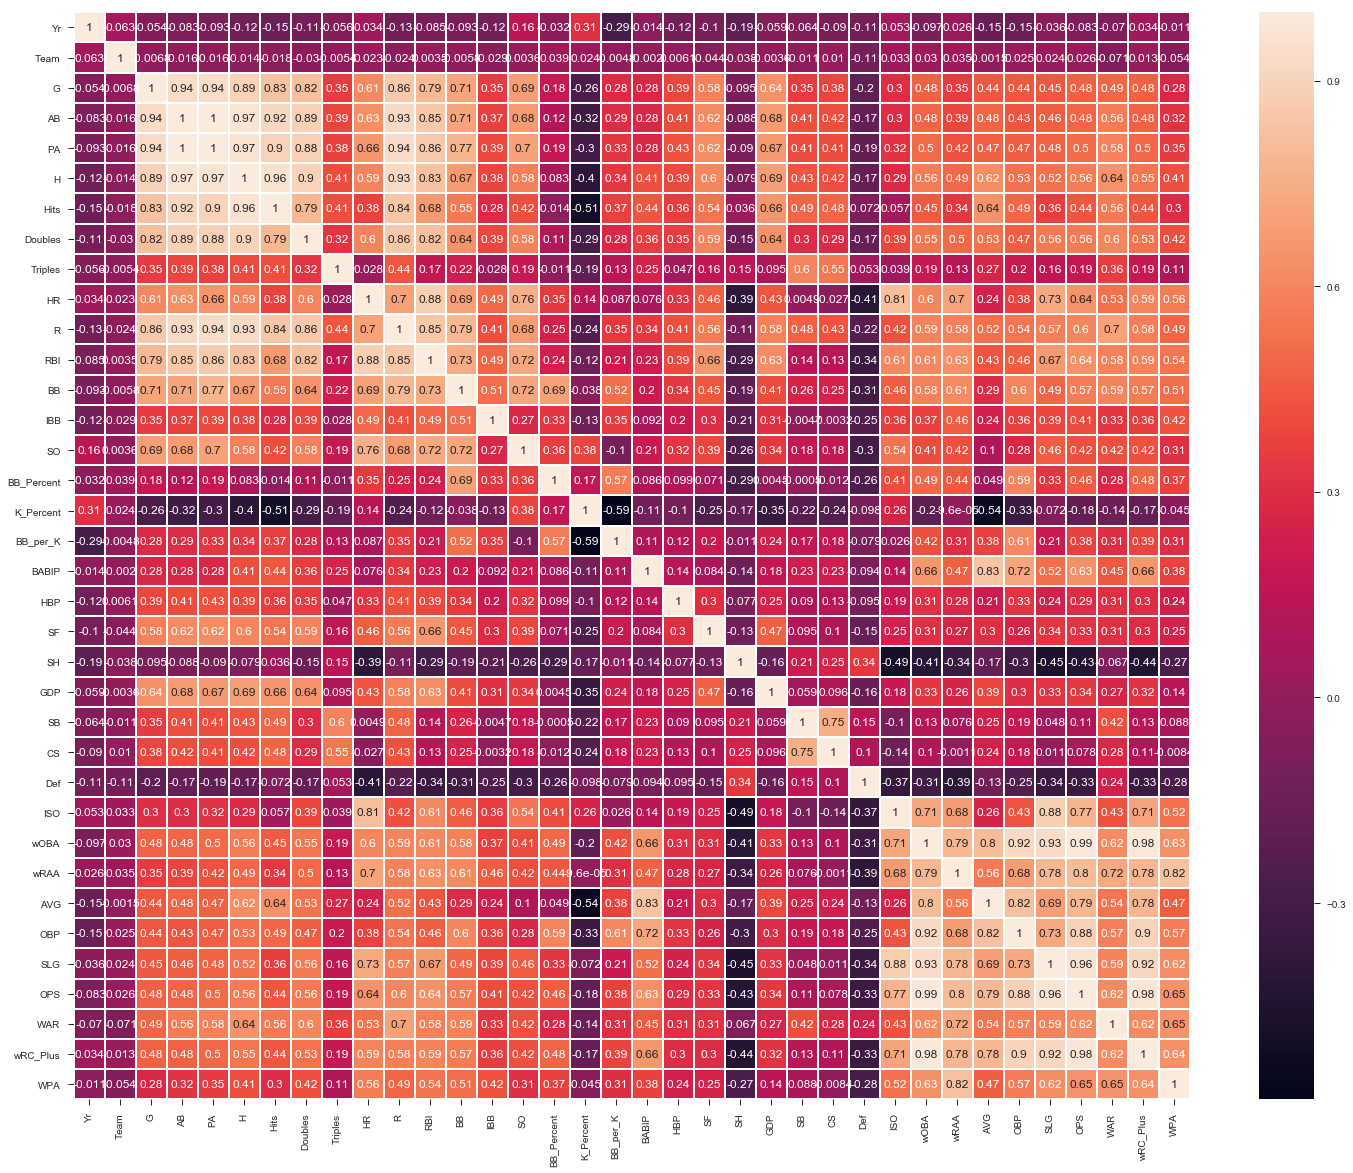

In [194]:
## Checking Correlation for Batters Independent Variables

plt.figure(figsize=(25, 20))
bat_df_corr = pd.DataFrame.corr(df_batX)
sns.heatmap(bat_df_corr, annot=True, linewidths=1)
plt.show()

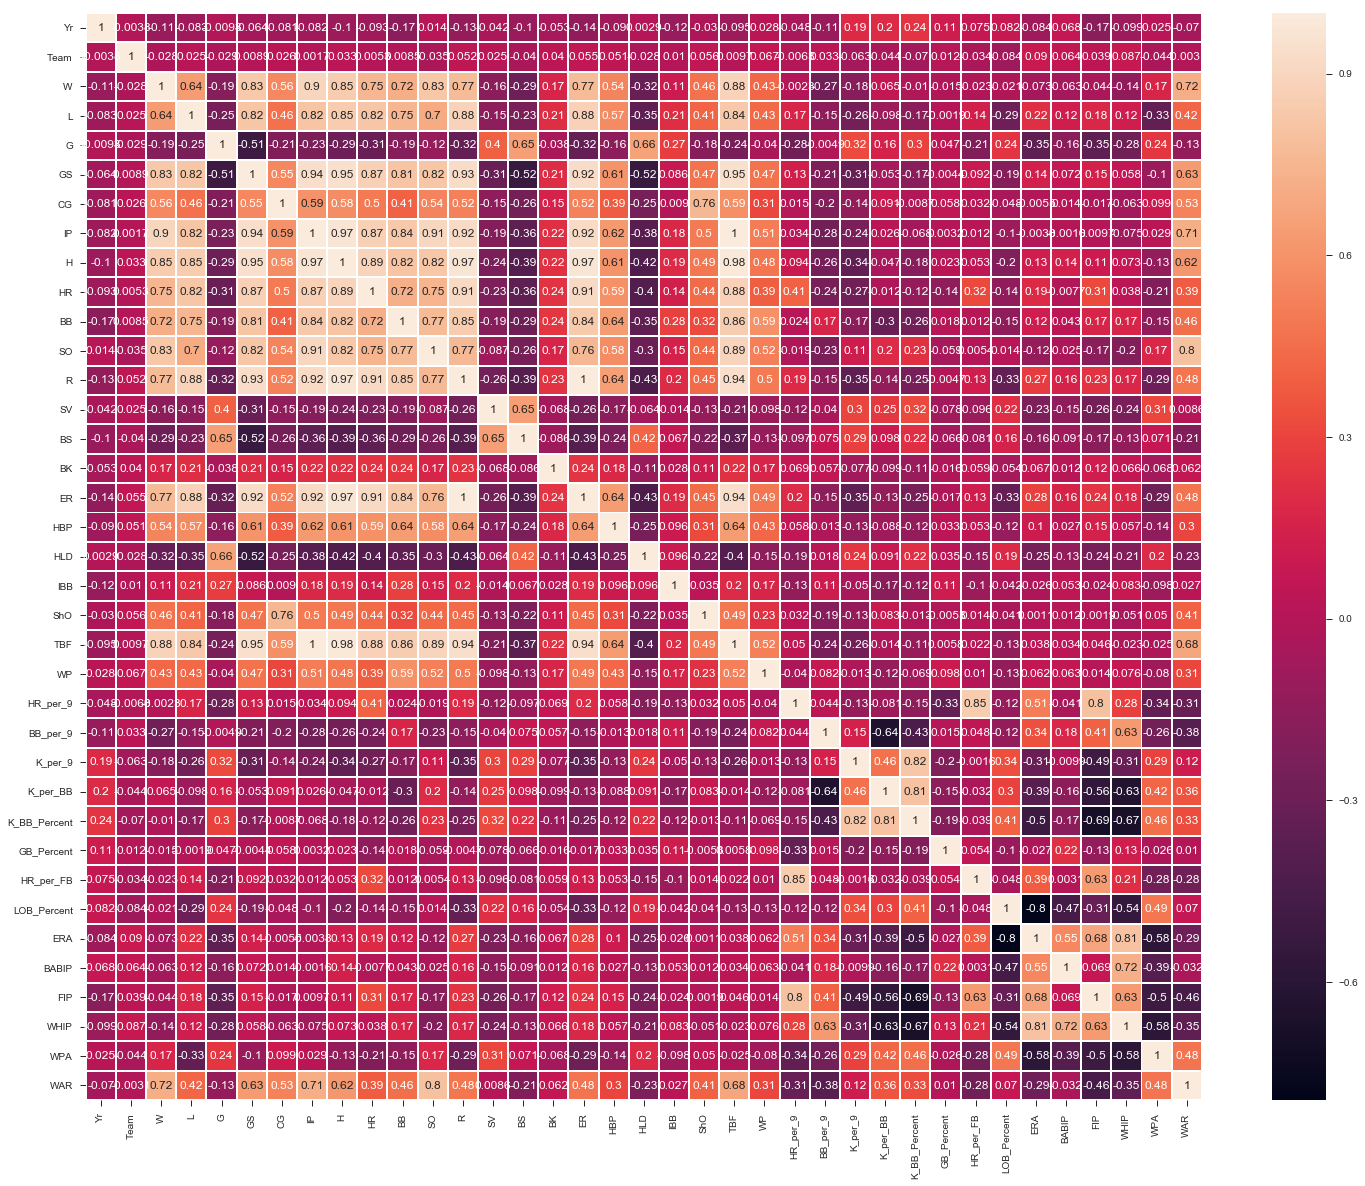

In [195]:
## Checking Correlation for Pitchers Independent Variables

plt.figure(figsize=(25, 20))
pit_df_corr = pd.DataFrame.corr(df_pitX)
sns.heatmap(pit_df_corr, annot=True, linewidths=1)
plt.show()

## * 1st Batters info Modeling and P-VALUE check

In [196]:
bat_dfX = sm.add_constant(df_batX)
bat_dfY = pd.DataFrame(df_batY, columns=["Salary"])

In [197]:
model_bat = sm.OLS(df_batY, bat_dfX)
result_bat = model_bat.fit()
print(result_bat.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     25.05
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.24e-97
Time:                        15:26:40   Log-Likelihood:                -10862.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     623   BIC:                         2.196e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.027e+07   6.57e+06      4.606      0.0

## * Eliminating Outliers Batters OLS analysis RESULT

In [209]:
idx_b = elim_outliers(result_bat)
print(idx_b, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_b)))

[  4   5   6   9  12  16  26  27  37  38  44  61  63  65  82  83  94 104
 111 120 134 137 140 143 162 180 182 183 187 199 204 211 221 223 224 230
 232 235 236 242 259 261 263 266 269 291 294 296 313 314 317 331 356 360
 372 378 430 432 435 464 466 471 480 508 512 516 520 522 535 539 541 549
 556 566 570 574 592 594 600 604 616 628 633 641 653 659] 

There are '86' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [227]:
dfX_b_idx = bat_dfX.drop(idx_b)
dfY_b_idx = df_batY.drop(idx_b)

In [228]:
dfX_b_idx_elimVer = sm.add_constant(dfX_b_idx)
model_b_idx_elimVer = sm.OLS(dfY_b_idx, dfX_b_idx_elimVer)
result_b_idx_elimVer = model_b_idx_elimVer.fit()
print(result_b_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     41.33
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          9.06e-131
Time:                        15:53:07   Log-Likelihood:                -9143.2
No. Observations:                 574   AIC:                         1.836e+04
Df Residuals:                     537   BIC:                         1.852e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.457e+07   4.34e+06      3.354      0.0

## * 1st Pitchers info Modeling and P-VALUE check

In [198]:
pit_dfX = sm.add_constant(df_pitX)
pit_dfY = pd.DataFrame(df_pitY, columns=['Salary'])

In [199]:
model_pit = sm.OLS(pit_dfY, pit_dfX)
result_pit = model_pit.fit()
print(result_pit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     31.40
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.37e-111
Time:                        15:27:13   Log-Likelihood:                -9566.9
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     551   BIC:                         1.938e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.707e+06   6.03e+06     -0.946   

## * Eliminating Outliers Pitchers OLS analysis RESULT

In [212]:
idx_p = elim_outliers(result_pit)
print(idx_p, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_p)))

[  3   4  10  12  13  18  20  35  48  50  53  55  56  62  63  65  68  76
  77  90  92  95 100 103 119 127 129 151 155 159 166 168 169 172 173 175
 184 195 197 205 209 220 223 225 228 245 249 263 281 291 326 328 331 336
 347 349 352 354 368 389 412 417 423 434 454 464 469 476 485 489 504 513
 515 524 530 542 543 544 548 557 560 562 564 574 575 576 588] 

There are '87' Outliers according to Fox criteria


In [363]:
dfX_p_idx = pit_dfX.drop(idx_p)
dfY_p_idx = df_pitY.drop(idx_p)

In [215]:
dfX_p_idx_elimVer = sm.add_constant(dfX_p_idx)
model_p_idx_elimVer = sm.OLS(dfY_idx_p, dfX_p_idx_elimVer)
result_p_idx_elimVer = model_p_idx_elimVer.fit()
print(result_p_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     42.17
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.31e-124
Time:                        15:39:29   Log-Likelihood:                -7912.0
No. Observations:                 502   AIC:                         1.590e+04
Df Residuals:                     464   BIC:                         1.606e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.159e+07   4.55e+06     -2.549   

## * Scaling above Batters and Pitchers Data

In [200]:
b_cols_list = df_batX.columns.tolist()
p_cols_list = df_pitX.columns.tolist()

In [201]:
bat_cols_list = " + ".join(b_cols_list)
pit_cols_list = " + ".join(p_cols_list)

---
# * Batters

### * OLS analysis that uses 'from-formula' for Batters

In [216]:
salary_str = "Salary ~ "

In [217]:
ols_bat_list = salary_str + bat_cols_list
ols_pit_list = salary_str + pit_cols_list
ols_bat_list

'Salary ~ Yr + Team + G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA'

## * Filtrating 5% P-VALUE of OLS modeling for Batters

In [218]:
dfX_bat1 = dmatrix(bat_cols_list, df_batX)
dfX_bat1_columns = dfX_bat1.design_info.column_names
dfX_bat1 = pd.DataFrame(dfX_bat1, columns=dfX_bat1_columns)

In [219]:
bat_pvalues1 = extracted_pvals(result_bat, 0.05)

extracted_feature_b1 = bat_pvalues1.index.values
extracted_bat_x1 = dfX_bat1.loc[:, extracted_feature_b1]

### * 2nd OLS analysis for Batters

In [220]:
model_bat2 = sm.OLS.from_formula(ols_bat_list, data=bat_df)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     25.05
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.24e-97
Time:                        15:41:14   Log-Likelihood:                -10862.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     623   BIC:                         2.196e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.027e+07   6.57e+06      4.606      0.0

## * Filtrating 5% P-VALUE of from-formula OLS modeling for Batters

In [222]:
bat_pvalues1 = extracted_pvals(result_bat2, 0.05)

extracted_feature_b1 = bat_pvalues1.index.values
extracted_bat_x1 = dfX_bat1.loc[:, extracted_feature_b1]

### * 2-2 OLS analysis for Batters

In [223]:
dfX_bat2 = sm.add_constant(extracted_bat_x1)

model_bat2 = sm.OLS(df_batY, dfX_bat2)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     50.31
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           2.02e-84
Time:                        15:42:40   Log-Likelihood:                -10940.
No. Observations:                 660   AIC:                         2.191e+04
Df Residuals:                     647   BIC:                         2.196e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G           -2.39e+04   6566.842     -3.640      0.0

## * Filtrating 5% P-VALUE of from-formula Elim OLS modeling for Batters

In [250]:
bat_elim_pvals = extracted_pvals(result_b_idx_elimVer, 0.05)

extracted_feature_b_elim = bat_elim_pvals.index.values
extracted_bat_elim_x = dfX_b_idx_elimVer.loc[:, extracted_feature_b_elim]

### * 2-3 Elim OLS analysis for Batters

In [251]:
dfX_bat_elim2 = sm.add_constant(extracted_bat_elim_x)

model_bat_elim2 = sm.OLS(dfY_b_idx, dfX_bat_elim2)
result_bat_elim2 = model_bat_elim2.fit()
print(result_bat_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.12e-131
Time:                        17:05:26   Log-Likelihood:                -9199.8
No. Observations:                 574   AIC:                         1.842e+04
Df Residuals:                     563   BIC:                         1.847e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G           1832.4349   4272.683      0.429      0.6

In [252]:
bat_elim_pvals2 = extracted_pvals(result_bat_elim2, 0.05)

extracted_feature_b_elim2 = bat_elim_pvals2.index.values
extracted_bat_elim_x2 = dfX_b_idx_elimVer.loc[:, extracted_feature_b_elim2]

### * 2-4 Elim OLS analysis for Batters

In [254]:
dfX_bat_elim3 = sm.add_constant(extracted_bat_elim_x2)

model_bat_elim3 = sm.OLS(dfY_b_idx, dfX_bat_elim3)
result_bat_elim3 = model_bat_elim3.fit()
print(result_bat_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.42e-133
Time:                        17:08:03   Log-Likelihood:                -9200.0
No. Observations:                 574   AIC:                         1.842e+04
Df Residuals:                     565   BIC:                         1.846e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wRAA        2.288e+05   1.68e+04     13.595      0.0

## * Dividing 3Types OLS modeling(1.Numeric Variables ONLY, 2.One Categorical Variable(Yr) + Numeric Variables + ZERO, and 3.The other Categorical Variable(Team) + Numeric Variables + ZERO) for 'BATTERS'

In [255]:
cols_b = df_batX.columns.tolist()

cat_cols_b = cols_b[:2]
num_cols_b = cols_b[2:]

cat_cols_list_b = []
num_cols_list_b = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_b:
        cat_cols_list_b.append("C(" + item1 + ")")
        
    for item2 in num_cols_b:
        num_cols_list_b.append("scale(" + item2 + ")")
        
    return cat_cols_list_b, num_cols_list_b

converted_cols_b = r_style_cat_cols(cat_cols_b, num_cols_b)

converted_cols_list_b = " + ".join(cat_cols_list_b + num_cols_list_b)
model_str_b = "Salary ~ "

zero = ' + 0'

ols_str_list_b = model_str_b + converted_cols_list_b + zero
merging_converted_cols_b = cat_cols_list_b + num_cols_list_b

## 1. Numeric Variables ONLY

### * 3rd OLS analysis

In [256]:
converted_num_ols_b = " + ".join(num_cols_list_b)

num_ols_model_b = model_str_b + converted_num_ols_b
num_ols_model_b

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA)'

In [257]:
model_bat3 = sm.OLS.from_formula(num_ols_model_b, data=bat_df)
result_bat3 = model_bat3.fit()
print(result_bat3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     26.08
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.67e-97
Time:                        17:09:34   Log-Likelihood:                -10866.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     625   BIC:                         2.196e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.866e+06   1.37e+0

## * Eliminating Outliers of Result-bat3 Model

In [376]:
idx_x_num = elim_outliers(result_bat3)
print(idx_x_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_x_num)))

[  4   5   9  12  16  26  27  32  37  38  61  63  65  82  83  94 104 111
 120 134 137 140 143 149 162 180 182 183 187 199 204 211 221 223 224 230
 232 235 236 242 259 263 265 266 269 291 294 296 312 313 314 317 331 354
 356 360 372 378 395 430 432 435 464 466 471 480 508 516 520 522 535 539
 541 549 556 566 570 574 592 594 600 604 616 628 633 641 659] 

There are '87' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [261]:
dfX_num_idx = df_batX.drop(idx_x_num)
dfY_num_idx = df_batY.drop(idx_x_num)

### * 3-1 OLS analysis for Batters

In [262]:
dfX_num_idx_elimVer = sm.add_constant(dfX_num_idx)
model_num_idx_elimVer = sm.OLS(dfY_num_idx, dfX_num_idx_elimVer)
result_num_idx_elimVer = model_num_idx_elimVer.fit()
print(result_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     40.74
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.88e-129
Time:                        17:15:04   Log-Likelihood:                -9133.2
No. Observations:                 573   AIC:                         1.834e+04
Df Residuals:                     536   BIC:                         1.850e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.724e+07    4.3e+06      4.007      0.0

## * Filtrating P-VALUE under 5% above model

In [263]:
bat_num_elim_pvals = extracted_pvals(result_num_idx_elimVer, 0.05)

extracted_feature_b_num_elim = bat_num_elim_pvals.index.values
extracted_bat_num_elim_x = dfX_num_idx_elimVer.loc[:, extracted_feature_b_num_elim]

### * 3-2 OLS analysis for Batters

In [264]:
dfX_bat_num_elim = sm.add_constant(extracted_bat_num_elim_x)

model_bat_num_elim = sm.OLS(dfY_num_idx, dfX_bat_num_elim)
result_bat_num_elim = model_bat_num_elim.fit()
print(result_bat_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     115.9
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.45e-129
Time:                        17:18:09   Log-Likelihood:                -9190.1
No. Observations:                 573   AIC:                         1.840e+04
Df Residuals:                     562   BIC:                         1.845e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G           1243.7801   4319.715      0.288      0.7

## * Filtrating P-VALUE under 5% above model2

In [265]:
bat_num_elim_pvals2 = extracted_pvals(result_bat_num_elim, 0.05)

extracted_feature_b_num_elim2 = bat_num_elim_pvals2.index.values
extracted_bat_num_elim_x2 = dfX_num_idx_elimVer.loc[:, extracted_feature_b_num_elim2]

### * 3-3 OLS analysis for Batters

In [266]:
dfX_bat_num_elim2 = sm.add_constant(extracted_bat_num_elim_x2)

model_bat_num_elim2 = sm.OLS(dfY_num_idx, dfX_bat_num_elim2)
result_bat_num_elim2 = model_bat_num_elim2.fit()
print(result_bat_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     145.4
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.04e-131
Time:                        17:20:43   Log-Likelihood:                -9190.2
No. Observations:                 573   AIC:                         1.840e+04
Df Residuals:                     564   BIC:                         1.844e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wRAA        2.273e+05   1.69e+04     13.416      0.0

## * 1st Filtrating P-VALUE under 5% of 3rd OLS model for Batters( Not Eliminate Outliters Ver.)

In [267]:
dfX_bat3 = dmatrix(converted_num_ols_b, df_batX)
dfX_bat3_columns = dfX_bat3.design_info.column_names
dfX_bat3 = pd.DataFrame(dfX_bat3, columns=dfX_bat3_columns)

In [268]:
bat_pvalues3 = extracted_pvals(result_bat3, 0.05)

extracted_feature_b3 = list(bat_pvalues3.index.values)
extracted_bat_x3 = dfX_bat3.loc[:, extracted_feature_b3]

### * 4th OLS analysis for Batters

In [269]:
dfX_bat4 = sm.add_constant(extracted_bat_x3)
model_bat4 = sm.OLS(df_batY, dfX_bat4)
result_bat4 = model_bat4.fit()
print(result_bat4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     66.00
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           4.18e-92
Time:                        17:31:02   Log-Likelihood:                -10926.
No. Observations:                 660   AIC:                         2.187e+04
Df Residuals:                     649   BIC:                         2.192e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.866e+06   1.47e+05  

## * Filtrating P-VALUE under 5% of 4th OLS model for Batters

In [270]:
bat_pvalues4 = extracted_pvals(result_bat4, 0.05)

extracted_feature_b4 = list(bat_pvalues4.index.values)
extracted_bat_x4 = dfX_bat4.loc[:, extracted_feature_b4]

In [271]:
dfX_bat4_1 = sm.add_constant(extracted_bat_x4)
model_bat4_1 = sm.OLS(bat_dfY, dfX_bat4_1)
result_bat4_1 = model_bat4_1.fit()
print(result_bat4_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     82.69
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           5.71e-94
Time:                        17:31:22   Log-Likelihood:                -10926.
No. Observations:                 660   AIC:                         2.187e+04
Df Residuals:                     651   BIC:                         2.191e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.866e+06   1.47e+05     33.172   

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [272]:
yr_str_b = 'C(Yr) + '

cat_num_ols_list_b = model_str + yr_str_b + converted_num_ols_b + zero
cat_num_ols_list_b

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

### * 5th OLS analysis for Batters

In [286]:
converted_yr_num_list_b = yr_str_b + converted_num_ols_b + zero
converted_yr_num_list_b

'C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

In [288]:
model_bat5 = sm.OLS.from_formula(cat_num_ols_list_b, bat_df)
result_bat5 = model_bat5.fit()
print(result_bat5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     21.74
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           6.99e-99
Time:                        17:47:30   Log-Likelihood:                -10843.
No. Observations:                 660   AIC:                         2.178e+04
Df Residuals:                     614   BIC:                         2.198e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Yr)[0]           4.659e+06   5.48e+0

## * Eliminating Outliers of Result-bat5 Model

In [296]:
dfX_bat5_elim = dmatrix(converted_yr_num_list_b, bat_df)
dfX_bat5_columns_elim = dfX_bat5_elim.design_info.column_names
dfX_bat5_elim = pd.DataFrame(dfX_bat5_elim, columns=dfX_bat5_columns_elim)

In [333]:
idx_yr_num = elim_outliers(result_bat5)
print(idx_yr_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_yr_num)))

[  3   4   5   9  12  16  26  27  37  38  44  61  63  65  74  78  82  83
  84  92  94 104 111 120 124 134 137 140 143 160 162 180 182 183 187 199
 204 211 221 223 224 230 232 235 236 242 259 261 263 265 266 269 291 294
 296 313 314 317 331 345 356 372 376 378 430 433 435 457 462 464 466 471
 480 486 516 520 535 539 541 556 566 585 592 594 600 602 604 616 628 641
 653 659] 

There are '92' Outliers according to Fox criteria


In [299]:
dfX_yr_num_idx = dfX_bat5_elim.drop(idx_yr_num)
dfY_yr_num_idx = df_batY.drop(idx_yr_num)

### * 5-1 OLS analysis for Batters

In [300]:
dfX_yr_num_idx_elimVer = sm.add_constant(dfX_yr_num_idx)
model_yr_num_idx_elimVer = sm.OLS(dfY_yr_num_idx, dfX_yr_num_idx_elimVer)
result_yr_num_idx_elimVer = model_yr_num_idx_elimVer.fit()
print(result_yr_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     39.56
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.59e-138
Time:                        17:50:42   Log-Likelihood:                -9025.1
No. Observations:                 568   AIC:                         1.814e+04
Df Residuals:                     523   BIC:                         1.834e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.259e+06   8.15e+0

## * Filtrating P-VALUE under 5% above model

In [301]:
bat_yr_num_elim_pvals = extracted_pvals(result_yr_num_idx_elimVer, 0.05)

extracted_feature_b_yr_num_elim = bat_yr_num_elim_pvals.index.values
extracted_bat_yr_num_elim_x = dfX_yr_num_idx_elimVer.loc[:, extracted_feature_b_yr_num_elim]

### * 5-2 OLS analysis for Batters

In [302]:
dfX_bat_yr_num_elim = sm.add_constant(extracted_bat_yr_num_elim_x)

model_bat_yr_num_elim = sm.OLS(dfY_yr_num_idx, dfX_bat_yr_num_elim)
result_bat_yr_num_elim = model_bat_yr_num_elim.fit()
print(result_bat_yr_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     55.99
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.50e-118
Time:                        17:50:49   Log-Likelihood:                -9124.8
No. Observations:                 568   AIC:                         1.829e+04
Df Residuals:                     547   BIC:                         1.838e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.435e+06   1.49e+05  

## * Filtrating P-VALUE under 5% above model2

In [329]:
bat_yr_num_elim_pvals2 = extracted_pvals(result_bat_yr_num_elim, 0.05)

extracted_feature_b_yr_num_elim2 = bat_yr_num_elim_pvals2.index.values
extracted_bat_yr_num_elim_x2 = dfX_bat_yr_num_elim.loc[:, extracted_feature_b_yr_num_elim2]

### * 5-3 OLS analysis for Batters

In [330]:
dfX_bat_yr_num_elim2 = sm.add_constant(extracted_bat_yr_num_elim_x2)

model_bat_yr_num_elim2 = sm.OLS(dfY_yr_num_idx, dfX_bat_yr_num_elim2)
result_bat_yr_num_elim2 = model_bat_yr_num_elim2.fit()
print(result_bat_yr_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     85.30
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          6.48e-123
Time:                        18:12:01   Log-Likelihood:                -9129.0
No. Observations:                 568   AIC:                         1.829e+04
Df Residuals:                     554   BIC:                         1.835e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.291e+06   1.14e+05  

## * Filtrating P-VALUE under 5% above model2

In [338]:
bat_yr_num_elim_pvals3 = extracted_pvals(result_bat_yr_num_elim2, 0.05)

extracted_feature_b_yr_num_elim3 = bat_yr_num_elim_pvals3.index.values
extracted_bat_yr_num_elim_x3 = dfX_bat_yr_num_elim2.loc[:, extracted_feature_b_yr_num_elim3]

### * 5-4 OLS analysis for Batters

In [341]:
dfX_bat_yr_num_elim3 = sm.add_constant(extracted_bat_yr_num_elim_x3)

model_bat_yr_num_elim3 = sm.OLS(dfY_yr_num_idx, dfX_bat_yr_num_elim3)
result_bat_yr_num_elim3 = model_bat_yr_num_elim3.fit()
print(result_bat_yr_num_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     100.1
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.90e-124
Time:                        18:26:36   Log-Likelihood:                -9131.1
No. Observations:                 568   AIC:                         1.829e+04
Df Residuals:                     556   BIC:                         1.834e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.232e+06   1.08e+05  

## * 1st Filtrating P-VALUE under 5% of 5th OLS model for Batters (Not Eliminate Outliters Ver.)

In [305]:
dfX_bat5 = dmatrix(converted_yr_num_list_b, df_batX)
dfX_bat5_columns = dfX_bat5.design_info.column_names
dfX_bat5 = pd.DataFrame(dfX_bat5, columns=dfX_bat5_columns)

In [306]:
bat_pvalues5 = extracted_pvals(result_bat5, 0.05)

extracted_feature_b5 = list(bat_pvalues5.index.values)
extracted_bat_x5 = dfX_bat5.loc[:, extracted_feature_b5]

### * 6th OLS analysis for Batters

In [307]:
dfX_bat6 = sm.add_constant(extracted_bat_x5)
model_bat6 = sm.OLS(df_batY, dfX_bat6)
result_bat6 = model_bat6.fit()
print(result_bat6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     36.46
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.16e-94
Time:                        17:52:58   Log-Likelihood:                -10897.
No. Observations:                 660   AIC:                         2.184e+04
Df Residuals:                     638   BIC:                         2.194e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.606e+06   1.32e+05  

## * Filtrating P-VALUE under 5% of 6th OLS model for Batters

In [308]:
bat_pvalues6 = extracted_pvals(result_bat6, 0.05)

extracted_feature_b6 = list(bat_pvalues6.index.values)
extracted_bat_x6 = dfX_bat6.loc[:, extracted_feature_b6]

### * 7th OLS analysis for Batters

In [309]:
dfX_bat7 = sm.add_constant(extracted_bat_x6)
model_bat7 = sm.OLS(df_batY, dfX_bat7)
result_bat7 = model_bat7.fit()
print(result_bat7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     58.54
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          5.11e-100
Time:                        17:53:28   Log-Likelihood:                -10900.
No. Observations:                 660   AIC:                         2.183e+04
Df Residuals:                     646   BIC:                         2.189e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.765e+06   1.86e+05  

## * Filtrating P-VALUE under 5% of 7th OLS model for Batters

In [310]:
bat_pvalues7 = extracted_pvals(result_bat7, 0.05)
extracted_feature_b7 = list(bat_pvalues7.index.values)
extracted_bat_x7 = dfX_bat7.loc[:, extracted_feature_b7]

### * 8th OLS analysis for Batters

In [311]:
dfX_bat8 = sm.add_constant(extracted_bat_x7)
model_bat8 = sm.OLS(bat_dfY, dfX_bat8)
result_bat8 = model_bat8.fit()
print(result_bat8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     63.00
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.59e-100
Time:                        17:53:57   Log-Likelihood:                -10902.
No. Observations:                 660   AIC:                         2.183e+04
Df Residuals:                     647   BIC:                         2.189e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.869e+06   1.76e+05  

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [312]:
team_str_b = 'C(Team) + '

cat_num_ols_list2_b = model_str + team_str_b + converted_num_ols_b + zero
cat_num_ols_list2_b

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

In [314]:
converted_team_num_list_b = team_str_b + converted_num_ols_b + zero
converted_team_num_list_b

'C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

### * 9th OLS analysis for Batters

In [313]:
model_bat9 = sm.OLS.from_formula(cat_num_ols_list2_b, bat_df)
result_bat9 = model_bat9.fit()
print(result_bat9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     14.46
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           8.60e-86
Time:                        17:55:54   Log-Likelihood:                -10844.
No. Observations:                 660   AIC:                         2.182e+04
Df Residuals:                     594   BIC:                         2.212e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Team)[0]         5.226e+06   1.35e+0

## * Eliminating Outliers of Result-bat9 Model

In [342]:
dfX_bat9_elim = dmatrix(converted_team_num_list_b, bat_df)
dfX_bat9_columns_elim = dfX_bat9_elim.design_info.column_names
dfX_bat9_elim = pd.DataFrame(dfX_bat9_elim, columns=dfX_bat9_columns_elim)

In [343]:
idx_team_num = elim_outliers(result_bat9)
print(idx_team_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_team_num)))

[  3   4   5   9  12  26  32  37  38  44  46  61  63  65  74  82  83  94
 104 111 120 134 137 139 140 162 180 182 183 187 199 204 211 223 224 225
 230 232 235 236 242 259 263 265 266 291 294 296 313 314 317 331 356 372
 378 430 433 435 457 462 464 471 480 486 504 508 516 522 535 539 541 549
 556 566 570 574 592 594 600 604 616 628 633 641 659] 

There are '85' Outliers according to Fox criteria


In [344]:
dfX_team_num_idx = dfX_bat9_elim.drop(idx_team_num)
dfY_team_num_idx = df_batY.drop(idx_team_num)

### * 9-1 OLS analysis for Batters

In [345]:
dfX_team_num_idx_elimVer = sm.add_constant(dfX_team_num_idx)
model_team_num_idx_elimVer = sm.OLS(dfY_team_num_idx, dfX_team_num_idx_elimVer)
result_team_num_idx_elimVer = model_team_num_idx_elimVer.fit()
print(result_team_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     24.97
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.13e-120
Time:                        18:30:08   Log-Likelihood:                -9137.2
No. Observations:                 575   AIC:                         1.840e+04
Df Residuals:                     510   BIC:                         1.869e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.331e+06   9.19e+0

## * Filtrating P-VALUE under 5% above model

In [346]:
bat_team_num_elim_pvals = extracted_pvals(result_team_num_idx_elimVer, 0.05)

extracted_feature_b_team_num_elim = bat_team_num_elim_pvals.index.values
extracted_bat_team_num_elim_x = dfX_team_num_idx_elimVer.loc[:, extracted_feature_b_team_num_elim]

### * 9-2 OLS analysis for Batters

In [347]:
dfX_bat_team_num_elim = sm.add_constant(extracted_bat_team_num_elim_x)

model_bat_team_num_elim = sm.OLS(dfY_team_num_idx, dfX_bat_team_num_elim)
result_bat_team_num_elim = model_bat_team_num_elim.fit()
print(result_bat_team_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     82.34
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.21e-135
Time:                        18:31:51   Log-Likelihood:                -9196.7
No. Observations:                 575   AIC:                         1.843e+04
Df Residuals:                     558   BIC:                         1.850e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.371e+06   9.87e+04  

## * Filtrating P-VALUE under 5% above model 2

In [348]:
bat_team_num_elim_pvals2 = extracted_pvals(result_bat_team_num_elim, 0.05)

extracted_feature_b_team_num_elim2 = bat_team_num_elim_pvals2.index.values
extracted_bat_team_num_elim_x2 = dfX_bat_team_num_elim.loc[:, extracted_feature_b_team_num_elim2]

### * 9-3 OLS analysis for Batters

In [349]:
dfX_bat_team_num_elim2 = sm.add_constant(extracted_bat_team_num_elim_x2)

model_bat_team_num_elim2 = sm.OLS(dfY_team_num_idx, dfX_bat_team_num_elim2)
result_bat_team_num_elim2 = model_bat_team_num_elim2.fit()
print(result_bat_team_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     99.81
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.81e-136
Time:                        18:32:46   Log-Likelihood:                -9200.8
No. Observations:                 575   AIC:                         1.843e+04
Df Residuals:                     561   BIC:                         1.849e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.375e+06   9.61e+04  

## * Filtrating P-VALUE under 5% above model2

In [350]:
bat_team_num_elim_pvals3 = extracted_pvals(result_bat_team_num_elim2, 0.05)

extracted_feature_b_team_num_elim3 = bat_team_num_elim_pvals3.index.values
extracted_bat_team_num_elim_x3 = dfX_bat_team_num_elim2.loc[:, extracted_feature_b_team_num_elim3]

### * 9-4 OLS analysis for Batters

In [351]:
dfX_bat_team_num_elim3 = sm.add_constant(extracted_bat_team_num_elim_x3)

model_bat_team_num_elim3 = sm.OLS(dfY_team_num_idx, dfX_bat_team_num_elim3)
result_bat_team_num_elim3 = model_bat_team_num_elim3.fit()
print(result_bat_team_num_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     107.7
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          5.11e-137
Time:                        18:33:16   Log-Likelihood:                -9202.0
No. Observations:                 575   AIC:                         1.843e+04
Df Residuals:                     562   BIC:                         1.849e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            4.37e+06   9.61e+04     45.

## * 1st Filtrating P-VALUE under 5% of 9th OLS model for Batters (Not Eliminate Outliters Ver.)

In [352]:
dfX_bat9 = dmatrix(converted_team_num_list_b, data=bat_df)
dfX_bat9_columns = dfX_bat9.design_info.column_names
dfX_bat9 = pd.DataFrame(dfX_bat9, columns=dfX_bat9_columns)

In [353]:
bat_pvalues9 = extracted_pvals(result_bat9, 0.05)

extracted_features9 = list(bat_pvalues9.index.values)
extracted_bat_x9 = dfX_bat9.loc[:, extracted_features9]

### * 10th OLS analysis for Batters

In [354]:
dfX_bat10 = sm.add_constant(extracted_bat_x9)
model_bat10 = sm.OLS(bat_dfY, dfX_bat10)
result_bat10 = model_bat10.fit()
print(result_bat10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     17.63
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           8.49e-79
Time:                        18:35:17   Log-Likelihood:                -10902.
No. Observations:                 660   AIC:                         2.189e+04
Df Residuals:                     618   BIC:                         2.208e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.616e+06   1.52e+05  

## * Filtrating P-VALUE under 5% of 10th OLS model

In [355]:
bat_pvalues10 = extracted_pvals(result_bat10, 0.01)
extracted_feature_b10 = list(bat_pvalues10.index.values)
extracted_bat_x10 = dfX_bat10.loc[:, extracted_feature_b10]

### * 11th OLS analysis for Batters

In [356]:
dfX_bat11 = sm.add_constant(extracted_bat_x10)
model_bat11 = sm.OLS(bat_dfY, dfX_bat11)
result_bat11 = model_bat11.fit()
print(result_bat11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           4.31e-91
Time:                        18:35:45   Log-Likelihood:                -10937.
No. Observations:                 660   AIC:                         2.189e+04
Df Residuals:                     653   BIC:                         2.192e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.754e+06   1.53e+05     30.976      

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 5-4 OLS analysis(filtrating 5% P-VALUE about OLS modeling of the Categorical variable(Yr) and all numeric variables) and 9-4 OLS analysis(filtrating 5% P-VALUE about OLS modeling of the Categorical variable(team) and all numeric variables) showed the best results for the total number of remaining variables and the performance of the variables. **

=======================================================================================

# * Pitchers

### * OLS analysis that uses 'from-formula' for Pitchers

In [357]:
ols_pit_list = salary_str + pit_cols_list
ols_pit_list = salary_str + pit_cols_list
ols_pit_list

'Salary ~ Yr + Team + W + L + G + GS + CG + IP + H + HR + BB + SO + R + SV + BS + BK + ER + HBP + HLD + IBB + ShO + TBF + WP + HR_per_9 + BB_per_9 + K_per_9 + K_per_BB + K_BB_Percent + GB_Percent + HR_per_FB + LOB_Percent + ERA + BABIP + FIP + WHIP + WPA + WAR'

## * Filtrating 5% P-VALUE of OLS modeling for Pitchers

In [358]:
dfX_pit1 = dmatrix(pit_cols_list, df_pitX)
dfX_pit1_columns = dfX_pit1.design_info.column_names
dfX_pit1 = pd.DataFrame(dfX_pit1, columns=dfX_pit1_columns)

In [359]:
pit_pvalues1 = extracted_pvals(result_pit, 0.05)

extracted_feature_p1 = pit_pvalues1.index.values
extracted_pit_x1 = dfX_pit1.loc[:, extracted_feature_p1]

### * 2nd OLS analysis for Pitchers

In [360]:
dfX_pit2 = sm.add_constant(extracted_pit_x1)

model_pit2 = sm.OLS(pit_dfY, dfX_pit2)
result_pit2 = model_pit2.fit()
print(result_pit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          5.96e-121
Time:                        18:43:43   Log-Likelihood:                -9608.3
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     581   BIC:                         1.927e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.022e+06   2.79e+05      3.664      0.0

## * Eliminating Outliers above OLS model for Pitchers

In [361]:
pit_elim_pvals = extracted_pvals(result_p_idx_elimVer, 0.05)

extracted_feature_p_elim = pit_elim_pvals.index.values
extracted_pit_elim_x = dfX_p_idx_elimVer.loc[:, extracted_feature_p_elim]

### * 2-3 Elim OLS analysis for Pitchers

In [364]:
dfX_pit_elim2 = sm.add_constant(extracted_pit_elim_x)

model_pit_elim2 = sm.OLS(dfY_p_idx, dfX_pit_elim2)
result_pit_elim2 = model_pit_elim2.fit()
print(result_pit_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     101.1
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.88e-124
Time:                        18:49:14   Log-Likelihood:                -7968.6
No. Observations:                 502   AIC:                         1.596e+04
Df Residuals:                     489   BIC:                         1.602e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
SO            6.672e+04   6373.116     10.469   

In [367]:
pit_elim_pvals2 = extracted_pvals(result_pit_elim2, 0.05)

extracted_feature_p_elim2 = pit_elim_pvals2.index.values
extracted_pit_elim_x2 = dfX_pit_elim2.loc[:, extracted_feature_p_elim2]

### * 2-4 Elim OLS analysis for Pitchers

In [368]:
dfX_pit_elim3 = sm.add_constant(extracted_pit_elim_x2)

model_pit_elim3 = sm.OLS(dfY_p_idx, dfX_pit_elim3)
result_pit_elim3 = model_pit_elim3.fit()
print(result_pit_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.75e-124
Time:                        18:53:17   Log-Likelihood:                -7975.5
No. Observations:                 502   AIC:                         1.597e+04
Df Residuals:                     492   BIC:                         1.601e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.094e+06    3.5e+05      3.129      0.0

In [369]:
pit_elim_pvals3 = extracted_pvals(result_pit_elim3, 0.05)

extracted_feature_p_elim3 = pit_elim_pvals3.index.values
extracted_pit_elim_x3 = dfX_pit_elim3.loc[:, extracted_feature_p_elim3]

### * 2-5 Elim OLS analysis for Pitchers

In [370]:
dfX_pit_elim4 = sm.add_constant(extracted_pit_elim_x3)

model_pit_elim4 = sm.OLS(dfY_p_idx, dfX_pit_elim4)
result_pit_elim4 = model_pit_elim4.fit()
print(result_pit_elim4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     146.7
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.64e-125
Time:                        18:54:28   Log-Likelihood:                -7976.0
No. Observations:                 502   AIC:                         1.597e+04
Df Residuals:                     493   BIC:                         1.601e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO          6.146e+04   4960.333     12.391      0.0

 ## ## * Dividing 3Types OLS modeling(1.Numeric Variables ONLY, 2.One Categorical Variable(Yr) + Numeric Variables + ZERO, and 3.The other Categorical Variable(Team) + Numeric Variables + ZERO) for 'PITCHERS'

In [373]:
cols_p = df_pitX.columns.tolist()

cat_cols_p = cols_p[:2]
num_cols_p = cols_p[2:70]

cat_cols_list_p = []
num_cols_list_p = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_p:
        cat_cols_list_p.append("C(" + item1 + ")")
        
    for item2 in num_cols_p:
        num_cols_list_p.append("scale(" + item2 + ")")
        
    return cat_cols_list_p, num_cols_list_p

converted_cols_p = r_style_cat_cols(cat_cols_p, num_cols_p)

converted_cols_list_p = " + ".join(cat_cols_list_p + num_cols_list_p)
model_str_p = "Salary ~ "

zero = ' + 0'

ols_str_list_p = model_str_p + converted_cols_list_p + zero
merging_converted_cols_p = cat_cols_list_p + num_cols_list_p

## 1. Numeric Variables ONLY

### * 3rd OLS analysis for Pitchers

In [374]:
converted_num_ols_p = " + ".join(num_cols_list_p)

num_ols_model_p = model_str_p + converted_num_ols_p
num_ols_model_p

'Salary ~ scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR)'

In [375]:
model_pit3 = sm.OLS.from_formula(num_ols_model_p, data=pit_df)
result_pit3 = model_pit3.fit()
print(result_pit3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          8.08e-112
Time:                        18:58:19   Log-Likelihood:                -9570.2
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     553   BIC:                         1.937e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.912e+06   1

## * Eliminating Outliers of Result-pit3 Model

In [377]:
idx_x_num = elim_outliers(result_pit3)
print(idx_x_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_x_num)))

[  3   4  10  12  13  18  20  35  48  50  53  55  56  62  63  65  68  76
  77  90  92  95 100 119 127 129 151 155 159 166 168 169 172 173 175 182
 184 195 197 205 209 220 223 225 228 245 249 263 281 291 326 328 331 336
 347 349 352 354 368 389 417 423 434 454 464 469 485 489 504 513 515 524
 525 530 542 543 544 548 557 560 562 564 574 575 576 588] 

There are '86' Outliers according to Fox criteria


In [378]:
dfX_num_idx = df_pitX.drop(idx_x_num)
dfY_num_idx = df_pitY.drop(idx_x_num)

### * 3-1 OLS analysis for Pitchers

In [379]:
dfX_num_idx_elimVer = sm.add_constant(dfX_num_idx)
model_num_idx_elimVer = sm.OLS(dfY_num_idx, dfX_num_idx_elimVer)
result_num_idx_elimVer = model_num_idx_elimVer.fit()
print(result_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     41.80
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          4.58e-124
Time:                        19:00:54   Log-Likelihood:                -7931.0
No. Observations:                 503   AIC:                         1.594e+04
Df Residuals:                     465   BIC:                         1.610e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.151e+07   4.59e+06     -2.509   

## * Filtrating P-VALUE under 5% above model

In [380]:
pit_num_elim_pvals = extracted_pvals(result_num_idx_elimVer, 0.05)

extracted_feature_p_num_elim = pit_num_elim_pvals.index.values
extracted_pit_num_elim_x = dfX_num_idx_elimVer.loc[:, extracted_feature_p_num_elim]

### * 3-2 OLS analysis for Pitchers

In [381]:
dfX_pit_num_elim = sm.add_constant(extracted_pit_num_elim_x)

model_pit_num_elim = sm.OLS(dfY_num_idx, dfX_pit_num_elim)
result_pit_num_elim = model_pit_num_elim.fit()
print(result_pit_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     115.6
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.64e-122
Time:                        19:02:23   Log-Likelihood:                -7995.2
No. Observations:                 503   AIC:                         1.601e+04
Df Residuals:                     492   BIC:                         1.606e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
SO            6.036e+04   6230.120      9.689   

## * Filtrating P-VALUE under 5% above model 2

In [382]:
pit_num_elim_pvals2 = extracted_pvals(result_pit_num_elim, 0.05)

extracted_feature__p_num_elim2 = pit_num_elim_pvals2.index.values
extracted_pit_num_elim_x2 = dfX_num_idx_elimVer.loc[:, extracted_feature__p_num_elim2]

### * 3-3 OLS analysis for Pitchers

In [383]:
dfX_pit_num_elim2 = sm.add_constant(extracted_pit_num_elim_x2)

model_pit_num_elim2 = sm.OLS(dfY_num_idx, dfX_pit_num_elim2)
result_pit_num_elim2 = model_pit_num_elim2.fit()
print(result_pit_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     162.0
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.10e-123
Time:                        19:03:33   Log-Likelihood:                -7999.7
No. Observations:                 503   AIC:                         1.602e+04
Df Residuals:                     495   BIC:                         1.605e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.75e+06   2.39e+05      7.308      0.0

## * 1st Filtrating P-VALUE under 5% of 3rd OLS model for Pitchers( Not Eliminate Outliters Ver.)

In [384]:
dfX_pit3 = dmatrix(converted_num_ols_p, df_pitX)
dfX_pit3_columns = dfX_pit3.design_info.column_names
dfX_pit3 = pd.DataFrame(dfX_pit3, columns=dfX_pit3_columns)

In [385]:
pit_pvalues3 = extracted_pvals(result_pit3, 0.05)

extracted_feature_p3 = list(pit_pvalues3.index.values)
extracted_pit_x3 = dfX_pit3.loc[:, extracted_feature_p3]

### * 4th OLS analysis for Pitchers

In [386]:
dfX_pit4 = sm.add_constant(extracted_pit_x3)
model_pit4 = sm.OLS(df_pitY, dfX_pit4)
result_pit4 = model_pit4.fit()
print(result_pit4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     123.9
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.31e-120
Time:                        19:05:24   Log-Likelihood:                -9607.5
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     580   BIC:                         1.927e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.912e+06   1

## * Filtrating P-VALUE under 5% of 4th OLS model for Pitchers

In [387]:
pit_pvalues4 = extracted_pvals(result_pit4, 0.05)

extracted_feature_p4 = list(pit_pvalues4.index.values)
extracted_pit_x4 = dfX_pit4.loc[:, extracted_feature_p4]

In [388]:
dfX_pit4_1 = sm.add_constant(extracted_pit_x4)
model_pit4_1 = sm.OLS(pit_dfY, dfX_pit4_1)
result_pit4_1 = model_pit4_1.fit()
print(result_pit4_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     123.9
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.31e-120
Time:                        19:06:07   Log-Likelihood:                -9607.5
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     580   BIC:                         1.927e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.912e+06   1

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [389]:
yr_str_p = 'C(Yr) + '

cat_num_ols_list_p = model_str + yr_str_p + converted_num_ols_p + zero
cat_num_ols_list_p

'Salary ~ C(Yr) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

### * 5th OLS analysis for Pitchers

In [390]:
converted_yr_num_list_p = yr_str_p + converted_num_ols_p + zero
converted_yr_num_list_p

'C(Yr) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

In [391]:
model_pit5 = sm.OLS.from_formula(cat_num_ols_list_p, pit_df)
result_pit5 = model_pit5.fit()
print(result_pit5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     26.57
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.97e-110
Time:                        19:08:22   Log-Likelihood:                -9553.4
No. Observations:                 589   AIC:                         1.920e+04
Df Residuals:                     542   BIC:                         1.941e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             5.642e+06   4

## * Eliminating Outliers of Result-pit5 Model

In [392]:
dfX_pit5_elim = dmatrix(converted_yr_num_list_p, pit_df)
dfX_pit5_columns_elim = dfX_pit5_elim.design_info.column_names
dfX_pit5_elim = pd.DataFrame(dfX_pit5_elim, columns=dfX_pit5_columns_elim)

In [393]:
idx_yr_num = elim_outliers(result_pit5)
print(idx_yr_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_yr_num)))

[  3   4   6  10  12  13  18  20  24  48  50  53  55  56  62  63  65  68
  76  77  90  92  95 100 119 127 129 137 141 151 153 155 159 166 168 173
 175 184 194 195 197 209 214 220 223 225 228 245 249 263 281 291 326 328
 331 336 347 349 354 368 389 412 417 423 434 447 454 464 469 476 478 485
 489 504 513 515 524 530 542 543 548 559 560 562 564 567 574 588] 

There are '88' Outliers according to Fox criteria


In [394]:
dfX_yr_num_idx = dfX_pit5_elim.drop(idx_yr_num)
dfY_yr_num_idx = df_pitY.drop(idx_yr_num)

### * 5-1 OLS analysis for Pitchers

In [395]:
dfX_yr_num_idx_elimVer = sm.add_constant(dfX_yr_num_idx)
model_yr_num_idx_elimVer = sm.OLS(dfY_yr_num_idx, dfX_yr_num_idx_elimVer)
result_yr_num_idx_elimVer = model_yr_num_idx_elimVer.fit()
print(result_yr_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     39.74
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          9.18e-131
Time:                        19:10:16   Log-Likelihood:                -7871.8
No. Observations:                 501   AIC:                         1.584e+04
Df Residuals:                     454   BIC:                         1.604e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.324e+06    

## * Filtrating P-VALUE under 5% above model

In [396]:
pit_yr_num_elim_pvals = extracted_pvals(result_yr_num_idx_elimVer, 0.05)

extracted_feature_p_yr_num_elim = pit_yr_num_elim_pvals.index.values
extracted_pit_yr_num_elim_x = dfX_yr_num_idx_elimVer.loc[:, extracted_feature_p_yr_num_elim]

### * 5-2 OLS analysis for Pitchers

In [397]:
dfX_pit_yr_num_elim = sm.add_constant(extracted_pit_yr_num_elim_x)

model_pit_yr_num_elim = sm.OLS(dfY_yr_num_idx, dfX_pit_yr_num_elim)
result_pit_yr_num_elim = model_pit_yr_num_elim.fit()
print(result_pit_yr_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     96.69
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.99e-143
Time:                        19:11:20   Log-Likelihood:                -7904.9
No. Observations:                 501   AIC:                         1.585e+04
Df Residuals:                     483   BIC:                         1.592e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.352e+06   1

## * Filtrating P-VALUE under 5% above model 2

In [398]:
pit_yr_num_elim_pvals2 = extracted_pvals(result_pit_yr_num_elim, 0.05)

extracted_feature_p_yr_num_elim2 = pit_yr_num_elim_pvals2.index.values
extracted_pit_yr_num_elim_x2 = dfX_pit_yr_num_elim.loc[:, extracted_feature_p_yr_num_elim2]

### * 5-3 OLS analysis for Pitchers

In [399]:
dfX_pit_yr_num_elim2 = sm.add_constant(extracted_pit_yr_num_elim_x2)

model_pit_yr_num_elim2 = sm.OLS(dfY_yr_num_idx, dfX_pit_yr_num_elim2)
result_pit_yr_num_elim2 = model_pit_yr_num_elim2.fit()
print(result_pit_yr_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.97e-144
Time:                        19:12:26   Log-Likelihood:                -7907.4
No. Observations:                 501   AIC:                         1.585e+04
Df Residuals:                     485   BIC:                         1.591e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.293e+06    

## * 1st Filtrating P-VALUE under 5% of 5th OLS model for Pitchers (Not Eliminate Outliters Ver.)

In [400]:
dfX_pit5 = dmatrix(converted_yr_num_list_p, df_pitX)
dfX_pit5_columns = dfX_pit5.design_info.column_names
dfX_pit5 = pd.DataFrame(dfX_pit5, columns=dfX_pit5_columns)

In [401]:
pit_pvalues5 = extracted_pvals(result_pit5, 0.05)

extracted_feature_p5 = list(pit_pvalues5.index.values)
extracted_pit_x5 = dfX_pit5.loc[:, extracted_feature_p5]

### * 6th OLS analysis for Pitchers

In [402]:
dfX_pit6 = sm.add_constant(extracted_pit_x5)
model_pit6 = sm.OLS(df_pitY, dfX_pit6)
result_pit6 = model_pit6.fit()
print(result_pit6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     56.01
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.09e-113
Time:                        19:14:35   Log-Likelihood:                -9601.1
No. Observations:                 589   AIC:                         1.924e+04
Df Residuals:                     570   BIC:                         1.932e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.519e+06   1.16e+05     38.935      0.0

## * Filtrating P-VALUE under 5% of 6th OLS model for Pitchers

In [403]:
pit_pvalues6 = extracted_pvals(result_pit6, 0.05)

extracted_feature_p6 = list(pit_pvalues6.index.values)
extracted_pit_x6 = dfX_pit6.loc[:, extracted_feature_p6]

### * 7th OLS analysis for Pitchers

In [404]:
dfX_pit7 = sm.add_constant(extracted_pit_x6)
model_pit7 = sm.OLS(df_pitY, dfX_pit7)
result_pit7 = model_pit7.fit()
print(result_pit7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     91.67
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          7.14e-119
Time:                        19:16:04   Log-Likelihood:                -9603.3
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     577   BIC:                         1.928e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.515e+06    1.5e+05     30.019      0.0

## * Filtrating P-VALUE under 5% of 7th OLS model for Pitchers

In [405]:
pit_pvalues7 = extracted_pvals(result_pit7, 0.05)
extracted_feature_p7 = list(pit_pvalues7.index.values)
extracted_pit_x7 = dfX_pit7.loc[:, extracted_feature_p7]

### * 8th OLS analysis for Pitchers

In [406]:
dfX_pit8 = sm.add_constant(extracted_pit_x7)
model_pit8 = sm.OLS(pit_dfY, dfX_pit8)
result_pit8 = model_pit8.fit()
print(result_pit8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     100.1
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.87e-119
Time:                        19:17:11   Log-Likelihood:                -9605.1
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     578   BIC:                         1.928e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.614e+06   1.41e+05     32.684      0.0

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [407]:
team_str_p = 'C(Team) + '

cat_num_ols_list2_p = model_str + team_str_p + converted_num_ols_p + zero
cat_num_ols_list2_p

'Salary ~ C(Team) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

In [408]:
converted_team_num_list_p = team_str_p + converted_num_ols_p + zero
converted_team_num_list_p

'C(Team) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

### * 9th OLS analysis for Pitchers

In [409]:
model_pit9 = sm.OLS.from_formula(cat_num_ols_list2_p, pit_df)
result_pit9 = model_pit9.fit()
print(result_pit9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     18.22
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           8.73e-98
Time:                        19:18:28   Log-Likelihood:                -9552.5
No. Observations:                 589   AIC:                         1.924e+04
Df Residuals:                     523   BIC:                         1.953e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           5.706e+06   6

## * Eliminating Outliers of Result-pit9 Model

In [410]:
dfX_pit9_elim = dmatrix(converted_team_num_list_p, pit_df)
dfX_pit9_columns_elim = dfX_pit9_elim.design_info.column_names
dfX_pit9_elim = pd.DataFrame(dfX_pit9_elim, columns=dfX_pit9_columns_elim)

In [411]:
idx_team_num = elim_outliers(result_pit9)
print(idx_team_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_team_num)))

[  3   4   8  10  12  13  18  21  35  50  53  55  56  62  63  65  68  76
  77  81  92  95 100 119 127 129 137 140 148 151 153 155 157 159 166 168
 173 175 178 184 195 197 203 205 214 216 220 223 225 228 242 245 249 250
 281 291 328 331 336 347 349 352 354 358 368 412 417 423 434 447 450 454
 464 469 476 485 489 504 513 515 524 530 542 543 548 557 562 564 574 575
 576 588] 

There are '92' Outliers according to Fox criteria


In [412]:
dfX_team_num_idx = dfX_pit9_elim.drop(idx_team_num)
dfY_team_num_idx = df_pitY.drop(idx_team_num)

### * 9-1 OLS analysis for Pitchers

In [413]:
dfX_team_num_idx_elimVer = sm.add_constant(dfX_team_num_idx)
model_team_num_idx_elimVer = sm.OLS(dfY_team_num_idx, dfX_team_num_idx_elimVer)
result_team_num_idx_elimVer = model_team_num_idx_elimVer.fit()
print(result_team_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     29.10
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          9.54e-121
Time:                        19:20:23   Log-Likelihood:                -7801.8
No. Observations:                 497   AIC:                         1.573e+04
Df Residuals:                     432   BIC:                         1.601e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.623e+06   8

## * Filtrating P-VALUE under 5% above model

In [414]:
pit_team_num_elim_pvals = extracted_pvals(result_team_num_idx_elimVer, 0.05)

extracted_feature_p_team_num_elim = pit_team_num_elim_pvals.index.values
extracted_pit_team_num_elim_x = dfX_team_num_idx_elimVer.loc[:, extracted_feature_p_team_num_elim]

### * 9-2 OLS analysis for Pitchers

In [415]:
dfX_pit_team_num_elim = sm.add_constant(extracted_pit_team_num_elim_x)

model_pit_team_num_elim = sm.OLS(dfY_team_num_idx, dfX_pit_team_num_elim)
result_pit_team_num_elim = model_pit_team_num_elim.fit()
print(result_pit_team_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     91.11
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          6.08e-138
Time:                        19:22:08   Log-Likelihood:                -7858.2
No. Observations:                 497   AIC:                         1.575e+04
Df Residuals:                     479   BIC:                         1.583e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 4.69e+06   9

## * Filtrating P-VALUE under 5% above model 2

In [416]:
pit_team_num_elim_pvals2 = extracted_pvals(result_pit_team_num_elim, 0.05)

extracted_feature_p_team_num_elim2 = pit_team_num_elim_pvals2.index.values
extracted_pit_team_num_elim_x2 = dfX_pit_team_num_elim.loc[:, extracted_feature_p_team_num_elim2]

### * 9-3 OLS analysis for Pitchers

In [417]:
dfX_pit_team_num_elim2 = sm.add_constant(extracted_pit_team_num_elim_x2)

model_pit_team_num_elim2 = sm.OLS(dfY_team_num_idx, dfX_pit_team_num_elim2)
result_pit_team_num_elim2 = model_pit_team_num_elim2.fit()
print(result_pit_team_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     102.9
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          2.39e-139
Time:                        19:24:19   Log-Likelihood:                -7859.6
No. Observations:                 497   AIC:                         1.575e+04
Df Residuals:                     481   BIC:                         1.582e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.719e+06      9e+0

## * 1st Filtrating P-VALUE under 5% of 9th OLS model for Pitchers (Not Eliminate Outliters Ver.)

In [418]:
dfX_pit9 = dmatrix(converted_team_num_list_p, data=pit_df)
dfX_pit9_columns = dfX_pit9.design_info.column_names
dfX_pit9 = pd.DataFrame(dfX_pit9, columns=dfX_pit9_columns)

In [419]:
pit_pvalues9 = extracted_pvals(result_pit9, 0.05)

extracted_features9 = list(pit_pvalues9.index.values)
extracted_pit_x9 = dfX_pit9.loc[:, extracted_features9]

### * 10th OLS analysis for Pitchers

In [420]:
dfX_pit10 = sm.add_constant(extracted_pit_x9)
model_pit10 = sm.OLS(pit_dfY, dfX_pit10)
result_pit10 = model_pit10.fit()
print(result_pit10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     28.86
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          1.75e-106
Time:                        19:28:02   Log-Likelihood:                -9578.0
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     550   BIC:                         1.940e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.775e+06   1.34e+05     35.763      

## * Filtrating P-VALUE under 5% of 10th OLS model

In [421]:
pit_pvalues10 = extracted_pvals(result_pit10, 0.01)
extracted_feature_p10 = list(pit_pvalues10.index.values)
extracted_pit_x10 = dfX_pit10.loc[:, extracted_feature_p10]

### * 11th OLS analysis for Pitchers

In [422]:
dfX_pit11 = sm.add_constant(extracted_pit_x10)
model_pit11 = sm.OLS(pit_dfY, dfX_pit11)
result_pit11 = model_pit11.fit()
print(result_pit11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 15 Jan 2018   Prob (F-statistic):          3.15e-125
Time:                        19:31:01   Log-Likelihood:                -9595.7
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     580   BIC:                         1.925e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.837e+06   1.23e+05     39.383      

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 5-3 OLS analysis(filtrating 5% P-VALUE about OLS modeling of the Categorical variable(Yr) and all numeric variables) and 9-3 OLS analysis(filtrating 5% P-VALUE about OLS modeling of the Categorical variable(team) and all numeric variables) showed the best results for the total number of remaining variables and the performance of the variables. **